In [2]:
!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn
!git clone git://github.com/scikit-learn/scikit-learn.git
!cd scikit-learn
!conda create -n sklearn-env -c conda-forge python=3.9 numpy scipy cython
!conda activate sklearn-env

Looking in indexes: https://pypi.org/simple, https://pypi.anaconda.org/scipy-wheels-nightly/simple


Cloning into 'scikit-learn'...


^C


Could not find conda environment: sklearn-env
You can list all discoverable environments with `conda info --envs`.



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import normalvariate
from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import shapiro
from scipy.optimize import minimize
import csv
from scipy.stats import f
from scipy.stats import norm
from scipy.stats import t
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KernelDensity
import pylab
import random
#from sklearn.linear_model import QuantileRegressor
import statsmodels.formula.api as smf
from scipy import stats

In [20]:
sns.set_theme()

# Моделирование данных

In [7]:
def law_fun(x):
    return 1.5*x - 2 - 1 / (2 * x)

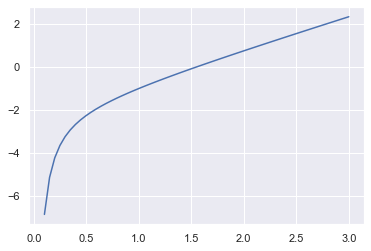

In [21]:
left_bound = 0.1
right_bound = 2.0
sigma = 1.0
ci_95 = 84
ci_80 = 97
alpha_005 = 0.05
alpha_001 = 0.01
alpha_0005 = 0.005

h_law = np.linspace(left_bound, right_bound + 1.0, sample_size)
y_law = [law_fun(x) for x in h_law]

plt.plot(h_law, y_law, '-')
plt.show()

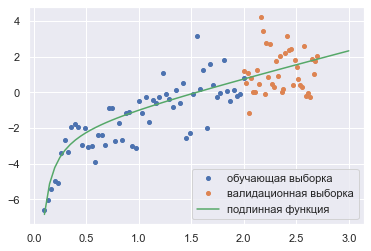

In [22]:
sample_size = 60
h_data = np.linspace(left_bound, right_bound, sample_size)
y_data = np.array([law_fun(i) + normalvariate(0, sigma) for i in h_data])

test_sample_size = 40
shift = right_bound - left_bound
h_data_test = np.linspace(left_bound + shift, right_bound + 0.7, test_sample_size)
y_data_test = np.array([law_fun(i) + normalvariate(0, sigma) for i in h_data_test])

plt.plot(h_data, y_data, 'o', label='обучающая выборка', markersize=4)
plt.plot(h_data_test, y_data_test, 'o', label='валидационная выборка', markersize=4)
plt.plot(h_law, y_law, '-', label='подлинная функция')
plt.legend()
plt.show()

In [1112]:
df = open('src/data/data_law.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x-1', 'x', 'x2', 'x3', 'x4', 'x5']])
    for h in h_law:
        writer.writerows([[
            str(1.0),
            str(h**(-1)),
            str(h),
            str(h**2),
            str(h**3),
            str(h**4),
            str(h**5)]])

In [1113]:
df = open('src/data/data.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x-1', 'x', 'x2', 'x3', 'x4', 'x5', 'y']])
    for i in range(len(h_data)):
        writer.writerows([[
            str(1.0),
            str(h_data[i]**(-1)),
            str(h_data[i]),
            str(h_data[i]**2),
            str(h_data[i]**3),
            str(h_data[i]**4),
            str(h_data[i]**5),
            str(y_data[i])]])

In [1114]:
df = open('src/data/data_test.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x-1', 'x', 'x2', 'x3', 'x4', 'x5', 'y']])
    for i in range(len(h_data_test)):
        writer.writerows([[
            str(1.0),
            str(h_data_test[i]**(-1)),
            str(h_data_test[i]),
            str(h_data_test[i]**2),
            str(h_data_test[i]**3),
            str(h_data_test[i]**4),
            str(h_data_test[i]**5),
            str(y_data_test[i])]])

In [23]:
df = pd.read_csv('src/data/data_law.csv')
X_law = df[['intercept', 'x-1', 'x','x2','x3','x4','x5']]
X1_law = df[['intercept', 'x']]
X2_law = df[['intercept', 'x-1','x']]
X3_law = df[['intercept', 'x-1','x','x2']]
X4_law = df[['intercept', 'x-1','x','x2','x3']]
X5_law = df[['intercept', 'x-1','x','x2','x3','x4']]
X6_law = df[['intercept', 'x-1','x','x2','x3','x4','x5']]

In [24]:
df = pd.read_csv('src/data/data.csv')
df_xy = df[['x', 'y']]
y_data = df['y']
X = df[['intercept', 'x-1', 'x','x2','x3','x4','x5']]
X1 = df[['intercept', 'x']]
X2 = df[['intercept', 'x-1','x']]
X3 = df[['intercept', 'x-1','x','x2']]
X4 = df[['intercept', 'x-1','x','x2','x3']]
X5 = df[['intercept', 'x-1','x','x2','x3','x4']]
X6 = df[['intercept', 'x-1','x','x2','x3','x4','x5']]

In [25]:
df_test = pd.read_csv('src/data/data_test.csv')
df_xy_test = df_test[['x', 'y']]
y_data_test = df_test['y']
X_test = df_test[['intercept', 'x-1', 'x','x2','x3','x4','x5']]
X1_test = df_test[['intercept', 'x']]
X2_test = df_test[['intercept', 'x-1', 'x']]
X3_test = df_test[['intercept', 'x-1', 'x','x2']]
X4_test = df_test[['intercept', 'x-1', 'x','x2','x3']]
X5_test = df_test[['intercept', 'x-1', 'x','x2','x3','x4']]
X6_test = df_test[['intercept', 'x-1', 'x','x2','x3','x4','x5']]

In [1118]:
X

,intercept,x-1,x,x2,x3,x4,x5
0,1.0,10.000000,0.100000,0.010000,0.001000,0.000100,0.000010
1,1.0,7.564103,0.132203,0.017478,0.002311,0.000305,0.000040
2,1.0,6.082474,0.164407,0.027030,0.004444,0.000731,0.000120
3,1.0,5.086207,0.196610,0.038656,0.007600,0.001494,0.000294
4,1.0,4.370370,0.228814,0.052356,0.011980,0.002741,0.000627
5,1.0,3.831169,0.261017,0.068130,0.017783,0.004642,0.001212
6,1.0,3.410405,0.293220,0.085978,0.025211,0.007392,0.002168
7,1.0,3.072917,0.325424,0.105901,0.034463,0.011215,0.003650
8,1.0,2.796209,0.357627,0.127897,0.045739,0.016358,0.005850
9,1.0,2.565217,0.389831,0.151968,0.059242,0.023094,0.009003


# МНК-оценка

In [88]:
def sum_loss(w):
    X = X1.transpose()
    return sum([np.abs(y_data[i] - np.dot(X[i],w)) for i in range(len(y_data))])

# def construct_confidence_interval(thetas_hat, alpha, sigma_hat, n, x):
#     down_bound = 0.0
#     up_bound = 0.0
#     add = norm.ppf(alpha) * sigma / np.sqrt(n)
#     down_bound = thetas_hat[0] + thetas_hat[1] * x - add
#     up_bound = thetas_hat[0] + thetas_hat[1] * x + add
#     return [down_bound, up_bound]

def lr(X, X_test, X_law, model_name, show_method_min_module=False, y_data=y_data, y_data_test=y_data_test, X1=X1, semilogy=False):
    model = LinearRegression(fit_intercept=False).fit(X, y_data)
    
    n, k = len(y_data), len(X.transpose())
    print('n =',n)
    print('k =',k)
    
    coeffs = model.coef_
    print('coeffs:', coeffs)
    
    R2 = model.score(X, y_data)
    print('R^2 =', R2)
    
    errors = y_data - model.predict(X)
    RMSE = np.sqrt((errors**2).sum() / len(y_data))
    print('RMSE =', RMSE)
    
    sigma_hat_2 = (errors**2).sum() / (len(y_data) - len(X.transpose()) - 1)
    HH = np.dot(np.matrix(X).transpose(), np.matrix(X))
    HH_inv = np.linalg.inv(HH)
    
    VIF = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    print('VIF:\n', VIF)
    multicol = False
    for vif in VIF:
        if vif > max(10, 1/(1 + R2)):
            multicol = True
    if multicol:
        print('Матрица H^T * H мультиколлинеарна')
    else:
        print('Матрица H^T * H не мультиколлинеарна')
    
    K_hat = sigma_hat_2 * HH_inv
    print('оценка ковариационной матрицы K:\n', K_hat)
    print('след ковариационной матрицы tr =', np.matrix.trace(K_hat))
    
    A = np.array(len(coeffs)*[1]).transpose()
    mid = np.linalg.inv(np.dot(np.dot(A.reshape(1, len(coeffs)), HH_inv), A.reshape(len(coeffs), 1)))
    num = np.dot(np.dot(coeffs.reshape(1,len(coeffs)), coeffs.reshape(len(coeffs),1)), mid)
    den = len(coeffs) / (n - k) * errors.sum()
    f_stat = num / den
    f_cv_1 = f.ppf([1 - alpha_005] , len(coeffs), n - k)
    f_cv_2 = f.ppf([1 - alpha_001] , len(coeffs), n - k)
    f_cv_3 = f.ppf([1 - alpha_0005] , len(coeffs), n - k)
    if f_stat < f_cv_3:
        print('гипотеза H_0: theta_i=0 принилась на уровне alpha =', alpha_0005)
    elif f_stat < f_cv_2:
        print('гипотеза H_0: theta_i=0 принилась на уровне alpha =', alpha_001)
    elif f_stat < f_cv_1:
        print('гипотеза H_0: theta_i=0 принилась на уровне alpha =', alpha_005)
    else:
        print('гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha =', alpha_005)
    
    A = (len(coeffs)-1)*[0]
    A.append(1)
    A = np.array(A).transpose()
    mid = np.linalg.inv(np.dot(np.dot(A.reshape(1, len(coeffs)), HH_inv), A.reshape(len(coeffs), 1)))
    num = np.dot(np.dot(coeffs.reshape(1,len(coeffs)), coeffs.reshape(len(coeffs),1)), mid)
    den = len(coeffs) / (n - k) * errors.sum()
    f_stat = num / den
    f_cv_1 = f.ppf([1 - alpha_005] , len(coeffs), n - k)
    f_cv_2 = f.ppf([1 - alpha_001] , len(coeffs), n - k)
    f_cv_3 = f.ppf([1 - alpha_0005] , len(coeffs), n - k)
    if f_stat < f_cv_3:
        print('гипотеза H_0: theta_n=0 принилась на уровне alpha =', alpha_0005)
    elif f_stat < f_cv_2:
        print('гипотеза H_0: theta_n=0 принилась на уровне alpha =', alpha_001)
    elif f_stat < f_cv_1:
        print('гипотеза H_0: theta_n=0 принилась на уровне alpha =', alpha_005)
    else:
        print('гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha =', alpha_005)
    
    confidence_intervals_down = []
    confidence_intervals_up = []
#     for i in range(len(h_law)):
#         [a, b] = t.interval(0.95, i, loc=errors.mean(), scale=stats.sem(errors))
#         confidence_intervals_down.append(a)
#         confidence_intervals_up.append(b)
    
    plt.figure(figsize=(16, 7), dpi=100)
#     plt.figure(figsize=(16, 16), dpi=100)
#     plt.grid()
    plt.plot(X1['x'], y_data, 'o', label='обучающая выборка')
    plt.plot(X_test['x'], y_data_test, 'o', label='валидационная выборка')
    plt.plot(X_law['x'], np.dot(X_law, model.coef_), 'r', label=model_name)
    plt.plot(h_law, y_law, 'k-', label='подлинная функция')
#     plt.plot(h_law, confidence_intervals_down, 'k-')
#     plt.plot(h_law, confidence_intervals_up, 'k-')
    
    if show_method_min_module:
        model_min_module = minimize(sum_loss, [-4,3])
        plt.plot(X_law['x'], np.dot(X_law, model_min_module.x), 'y', label='линия МНМ')
        print('min modules coeffs:', model_min_module.x)
        print('МНМ R^2 =', np.corrcoef(np.dot(X1, model_min_module.x), y_data)[0][1]**2)
        eps = [(y_data[i] - np.dot(X1.transpose()[i], model_min_module.x))**2 for i in range(len(y_data))]
        RMSE_2 = np.sqrt(sum(eps) / len(y_data))
        print('МНМ RMSE =', RMSE_2)
        print('Сумма квадратов отклонений на обучающей выборке (МНМ):', ((y_data - np.dot(X,model_min_module.x))**2).sum())
        print('Сумма квадратов отклонений на тестовой выборке (МНМ):', ((y_data_test - np.dot(X_test,model_min_module.x))**2).sum())
        print('Сумма модулей отклонений на обучающей выборке (МНМ):', (abs(y_data - np.dot(X,model_min_module.x))).sum())
        print('Сумма модулей отклонений на тестовой выборке (МНМ):', (abs(y_data_test - np.dot(X_test,model_min_module.x))).sum())
        print('Сумма модулй отклонений на обучающей выборке:', (abs(y_data - model.predict(X))).sum())
        print('Сумма модулей отклонений на тестовой выборке:', (abs(y_data_test - model.predict(X_test))).sum())
    if multicol:
        model_ridge = Ridge(alpha=0.3).fit(X, y_data)
        plt.plot(X_law['x'], model_ridge.intercept_ + np.dot(X_law, model_ridge.coef_), 'g', label=model_name + '(ридж-оценка)')
        print('Сумма квадратов отклонений на обучающей выборке (ridge):', ((y_data - model_ridge.predict(X))**2).sum())
        print('Сумма квадратов отклонений на тестовой выборке (ridge):', ((y_data_test - model_ridge.predict(X_test))**2).sum())
    print('Сумма квадратов отклонений на обучающей выборке:', ((y_data - model.predict(X))**2).sum())
    print('Сумма квадратов отклонений на тестовой выборке:', ((y_data_test - model.predict(X_test))**2).sum())
    
    if semilogy:
        plt.yscale('log')
    plt.legend()
    plt.show()
    
    return coeffs, errors, sigma_hat_2

Text(0, 0.5, 'X')

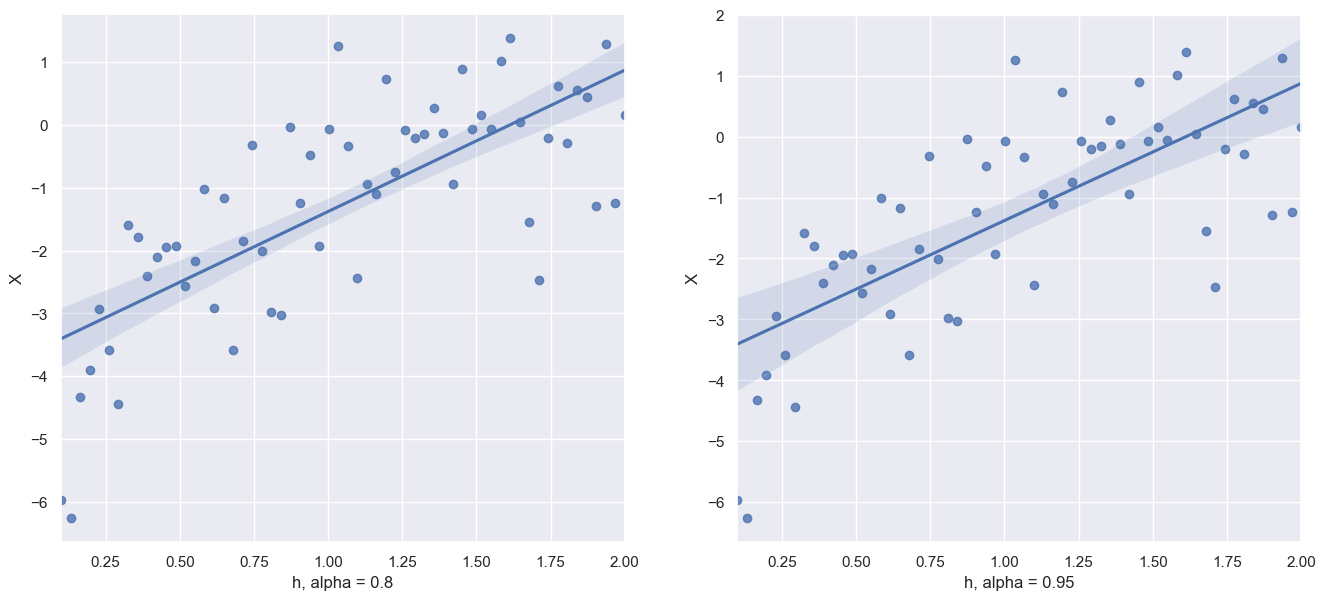

In [26]:
plt.figure(figsize=(16, 7), dpi=100)
pylab.subplot (1, 2, 1)
sns.regplot(data=df_xy, x='x', y='y', ci=ci_95)
plt.xlabel('h, alpha = 0.8')
plt.ylabel('X')

pylab.subplot (1, 2, 2)
sns.regplot(data=df_xy, x='x', y='y', ci=ci_80)
plt.xlabel('h, alpha = 0.95')
plt.ylabel('X')

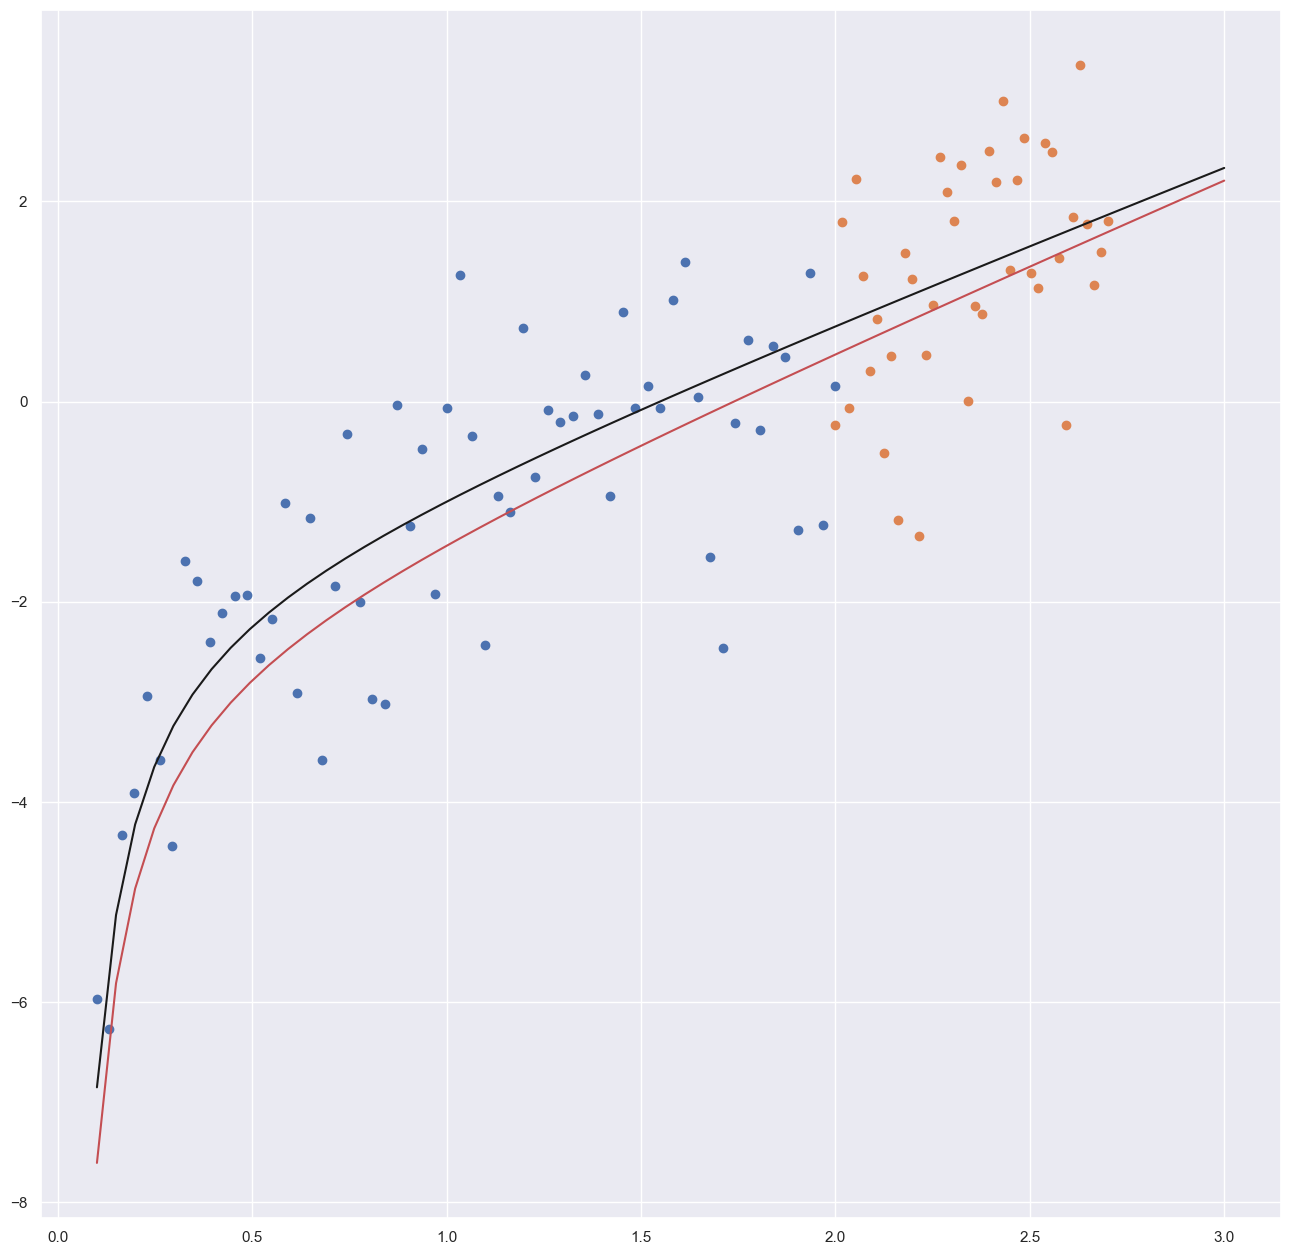

In [1302]:
# проверка эвристической гипотезы

plt.figure(figsize=(16, 16), dpi=100)
plt.plot(X1['x'], y_data, 'o', label='обучающая выборка')
plt.plot(X_test['x'], y_data_test, 'o', label='валидационная выборка')
plt.plot(X_law['x'], np.dot(X2_law, [(-1.51 - 3.63) / 2, -0.52, (1.05 + 2.25) / 2]), 'r', label='эвристическая модель')
plt.plot(h_law, y_law, 'k-', label='подлинная функция')

n = 60
k = 2
coeffs: [-3.62927071  2.25163253]
R^2 = 0.5453763066069277
RMSE = 1.1465085642381998
VIF:
 [4.544661913627899, 0.9999999999999998]
Матрица H^T * H не мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 0.10480484 -0.07785119]
 [-0.07785119  0.07414399]]
след ковариационной матрицы tr = [[0.17894883]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
min modules coeffs: [-3.33635067  2.11705856]
МНМ R^2 = 0.5453763066069279
МНМ RMSE = 1.1589230074253976
Сумма квадратов отклонений на обучающей выборке (МНМ): 80.58615222839569
Сумма квадратов отклонений на тестовой выборке (МНМ): 43.62918356250616
Сумма модулей отклонений на обучающей выборке (МНМ): 52.625934961656164
Сумма модулей отклонений на тестовой выборке (МНМ): 34.54191734014789
Сумма модулй отклонений на обучающей выборке: 53.93767681398762
Сумма модулей отклонений на тестовой выборке: 34.77685614802216
Сумма квадратов отклонений на обучающей вы

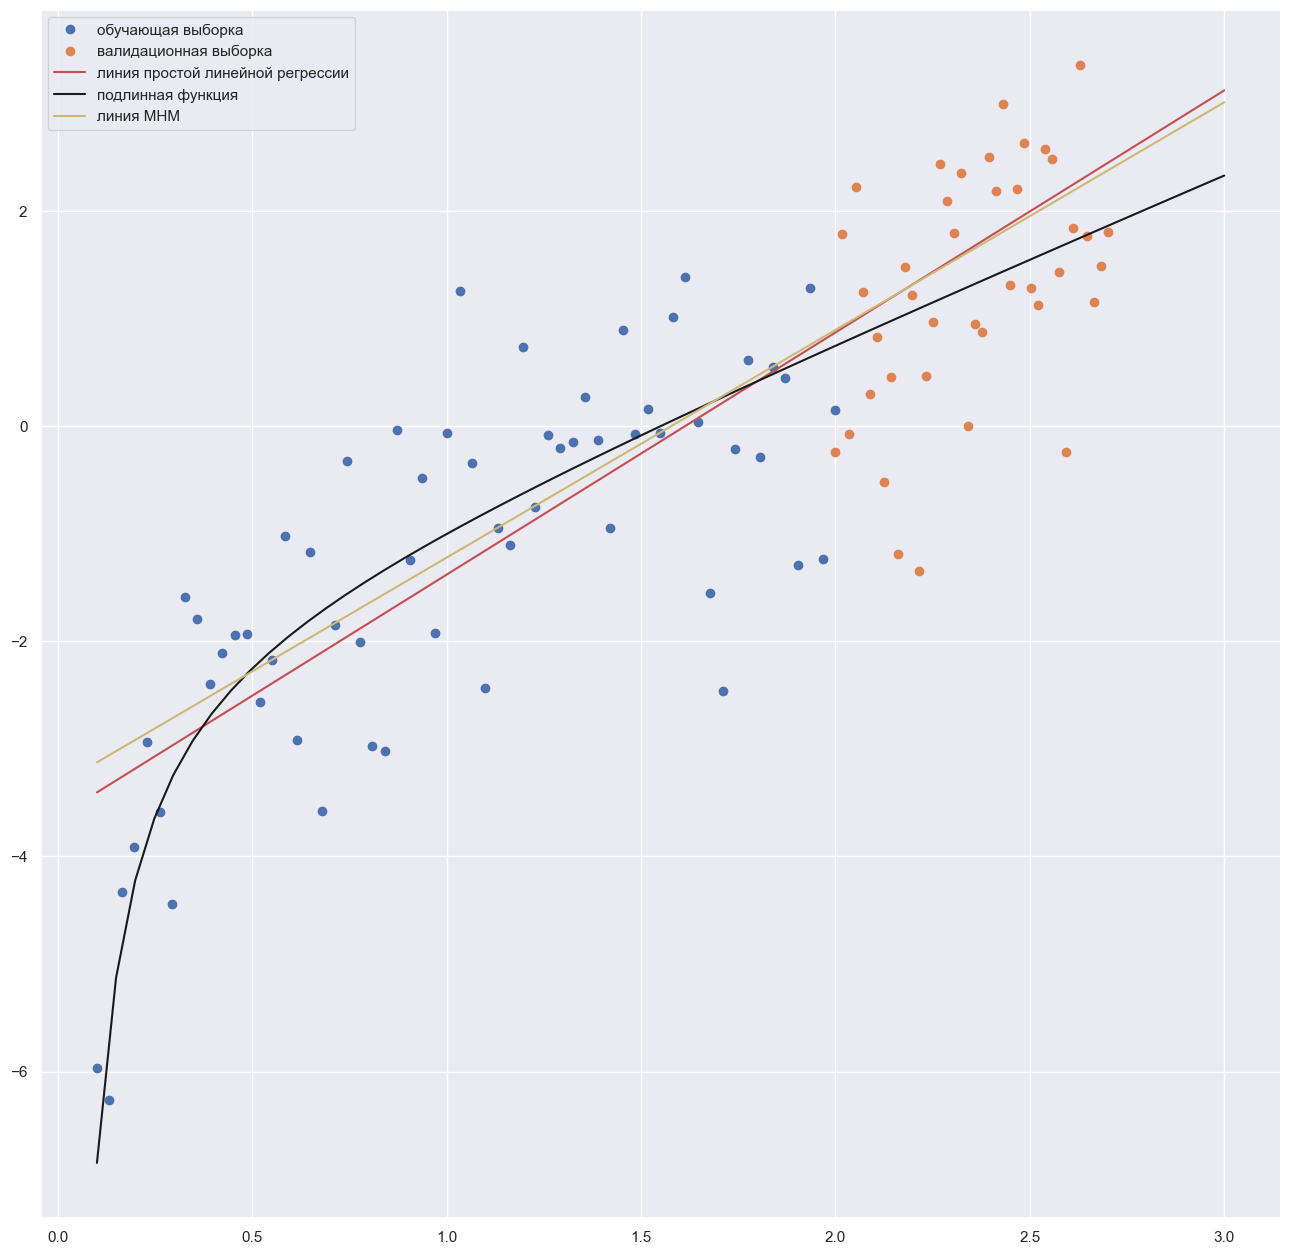

log_likehood = -94.87838841506971
AIC = 0.3914025474263114
AIC_c = 0.6019288632157851
BIC = 197.94546595458363


In [28]:
coeffs, errors, sigma_hat_2 = lr(X1, X1_test, X1_law, 'линия простой линейной регрессии', show_method_min_module=True)
log_likehood = -len(y_data) / 2.0 * (1 + np.log(2 * np.pi) + np.log(sigma_hat_2))
k = 2
AIC = 2 * k / len(y_data) + np.log(sigma_hat_2)
AIC_c = AIC + 2 * k * (k + 1) / (len(y_data) - k - 1)
BIC = k * np.log(len(y_data)) - 2 * log_likehood
print('log_likehood =', log_likehood)
print('AIC =', AIC)
print('AIC_c =', AIC_c)
print('BIC =', BIC)
# conf_int = t.interval(0.8, df=len(y_data)-2, loc=coeffs[0], scale=coeffs[1])
# print(conf_int)
# plt.plot(conf_int[0], conf_int[1])

In [35]:
def errors_test(X, errors, dl, du):
    plt.hist(errors)
    plt.show()

    shapiro_test = shapiro(errors)
    print('Критерий Шапиро-Уилка')
    print('statistic =', shapiro_test[0],'pvalue =', shapiro_test[1])
    if shapiro_test[1] < 0.05:
        print('распределение ошибок нормальное на уровне значимости 0.05')
    else:
        print('гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять')

    print()
    
    durbin_watson_test = durbin_watson(errors)
    print('значение статистики Дарбина-Уотсона:', durbin_watson_test)
    print('выборочный коэффициент корреляции r =', 1 - durbin_watson_test/2)
    if 0 < durbin_watson_test < dl:
        print('гопотеза о некоррелированности отвергается')
    elif dl < durbin_watson_test < du:
        print('гопотеза о некоррелированности не пренимается и не отвергается')
    elif du < durbin_watson_test < 4 - du:
        print('гопотеза о некоррелированности принимается')
    elif 4 - du < durbin_watson_test < 4 - dl:
        print('гопотеза о некоррелированности не пренимается и не отвергается')
    else:
        print('гопотеза о некоррелированности отвергается')
        
    print()
    
    het_breuschpagan_test = het_breuschpagan(errors, X)
    print('значение f-статистики Бройша-Пагана', het_breuschpagan_test)
    if het_breuschpagan_test[3] < 0.05:
        print('гипотеза о гетероскедостичности отвергается на уровне значимости 0.05')
    else:
        print('гипотеза о гетероскедостичности принимается на уровне значимости 0.05')

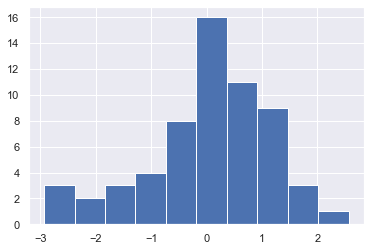

Критерий Шапиро-Уилка
statistic = 0.9698827862739563 pvalue = 0.1440102756023407
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 1.3728814469511434
выборочный коэффициент корреляции r = 0.3135592765244283
гопотеза о некоррелированности отвергается

значение f-статистики Бройша-Пагана (0.5927897317393183, 0.4413423698413812, 0.578748005261066, 0.44988531492530526)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [1135]:
errors_test(X1, errors, dl=1.55, du=1.62)

Text(0, 0.5, 'функция распределения')

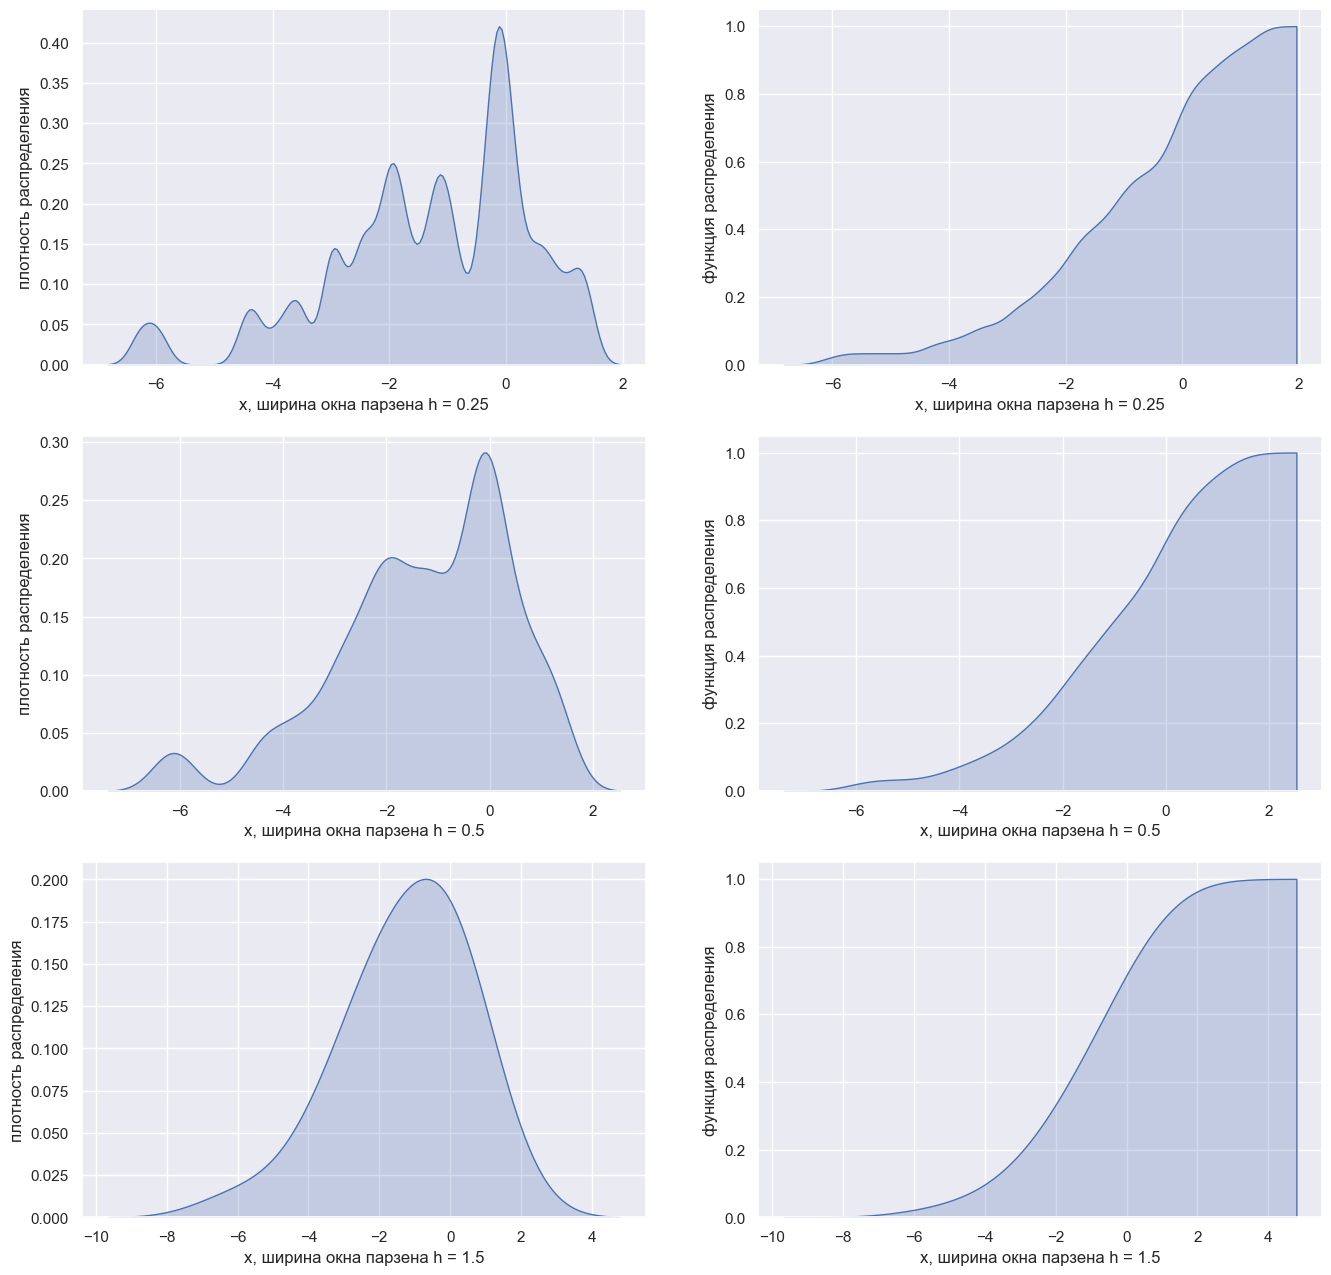

In [1137]:
plt.figure(figsize=(16, 16), dpi=100)

pylab.subplot (3, 2, 1)
sns.kdeplot(y_data, fill=True, bw_adjust=0.25, palette="crest", cumulative=False)
plt.xlabel('x, ширина окна парзена h = 0.25')
plt.ylabel('плотность распределения')

pylab.subplot (3, 2, 2)
sns.kdeplot(y_data, shade=True, bw_adjust=0.25, palette="crest", cumulative=True)
plt.xlabel('x, ширина окна парзена h = 0.25')
plt.ylabel('функция распределения')

pylab.subplot (3, 2, 3)
sns.kdeplot(y_data, shade=True, bw_adjust=0.5, palette="crest", cumulative=False)
plt.xlabel('x, ширина окна парзена h = 0.5')
plt.ylabel('плотность распределения')

pylab.subplot (3, 2, 4)
sns.kdeplot(y_data, shade=True, bw_adjust=0.5, palette="crest", cumulative=True)
plt.xlabel('x, ширина окна парзена h = 0.5')
plt.ylabel('функция распределения')

pylab.subplot (3, 2, 5)
sns.kdeplot(y_data, shade=True, bw_adjust=1.5, palette="crest", cumulative=False)
plt.xlabel('x, ширина окна парзена h = 1.5')
plt.ylabel('плотность распределения')

pylab.subplot (3, 2, 6)
sns.kdeplot(y_data, shade=True, bw_adjust=1.5, palette="crest", cumulative=True)
plt.xlabel('x, ширина окна парзена h = 1.5')
plt.ylabel('функция распределения')

# Полиномиальная регрессия

n = 60
k = 3
coeffs: [-1.51393561 -0.51744839  1.04638596]
R^2 = 0.6801247013905984
RMSE = 0.9617044428850553
VIF:
 [16.02969403884323, 2.1596567109728593, 2.159656710972858]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 0.26474054 -0.04639971 -0.16382933]
 [-0.04639971  0.01135019  0.02643699]
 [-0.16382933  0.02643699  0.11467696]]
след ковариационной матрицы tr = [[0.39076769]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
Сумма квадратов отклонений на обучающей выборке (ridge): 55.50099217332444
Сумма квадратов отклонений на тестовой выборке (ridge): 56.535779778007154
Сумма квадратов отклонений на обучающей выборке: 55.492526127891274
Сумма квадратов отклонений на тестовой выборке: 54.85399851441085


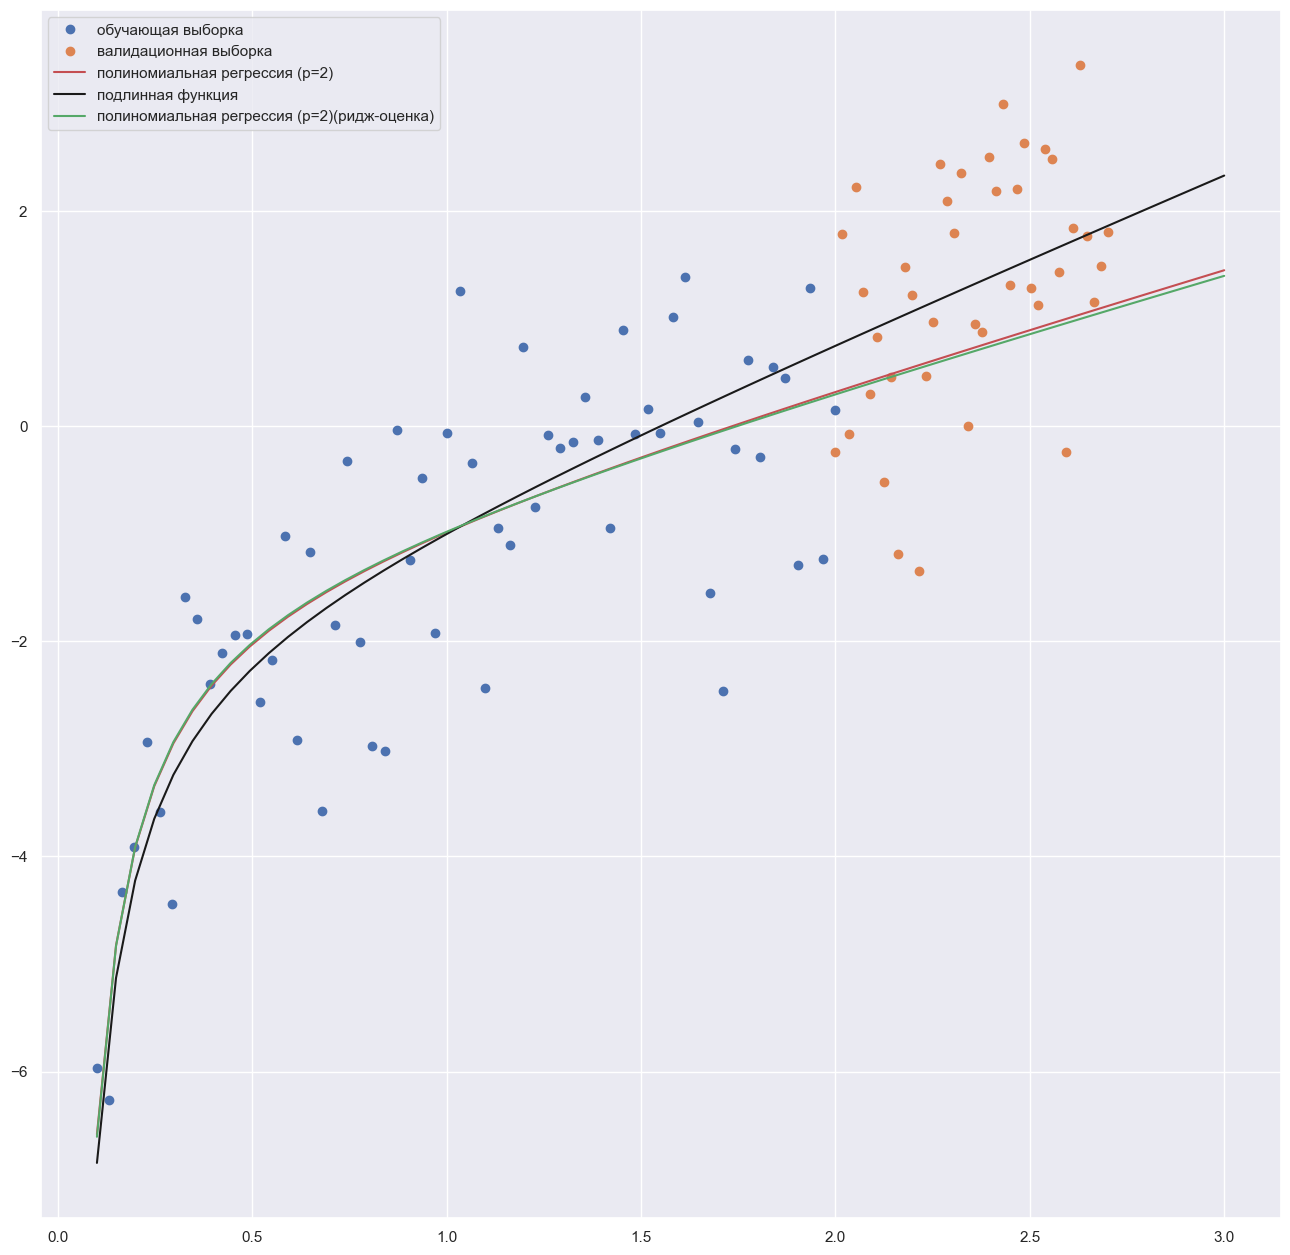

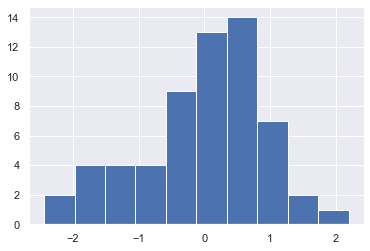

Критерий Шапиро-Уилка
statistic = 0.9693567752838135 pvalue = 0.13571056723594666
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 1.9475642170484502
выборочный коэффициент корреляции r = 0.026217891475774913
гопотеза о некоррелированности принимается

значение f-статистики Бройша-Пагана (1.1947449286796163, 0.5502555543812593, 0.5790338027795682, 0.5637016417377521)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [1133]:
coeffs, errors, sigma_hat_2 = lr(X2, X2_test, X2_law, 'полиномиальная регрессия (p=2)')
errors_test(X2, errors, dl=1.51, du=1.65)

n = 60
k = 4
coeffs: [-2.75825217 -0.37437794  3.12932332 -0.83318861]
R^2 = 0.6883895128708153
RMSE = 0.9491990674658437
VIF:
 [80.82242322795281, 4.851446632172911, 58.63003612005568, 42.09320373192414]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 1.32398719 -0.1680613  -1.93923664  0.71070706]
 [-0.1680613   0.02528986  0.23051004 -0.08171649]
 [-1.93923664  0.23051004  3.08793606 -1.18969588]
 [ 0.71070706 -0.08171649 -1.18969588  0.47588615]]
след ковариационной матрицы tr = [[4.91309926]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
Сумма квадратов отклонений на обучающей выборке (ridge): 54.81868388820528
Сумма квадратов отклонений на тестовой выборке (ridge): 76.20724437400352
Сумма квадратов отклонений на обучающей выборке: 54.05873218068164
Сумма квадратов отклонений на тестовой выборке: 145.10275378516144


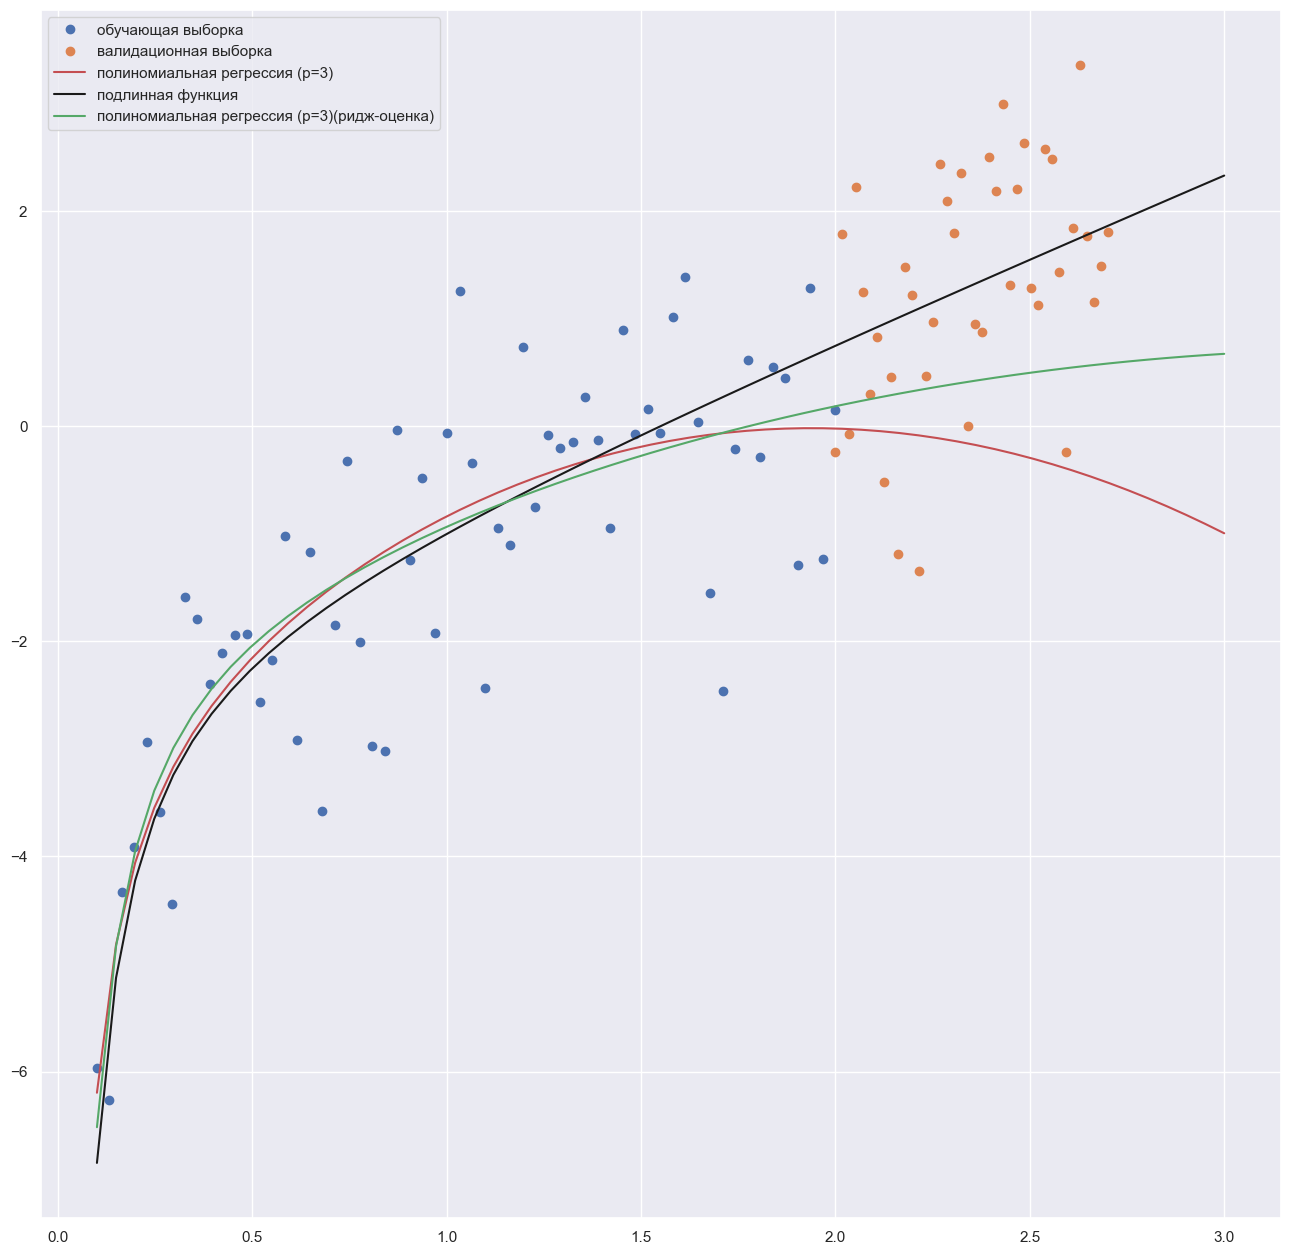

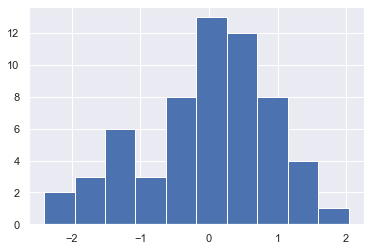

Критерий Шапиро-Уилка
statistic = 0.9678374528884888 pvalue = 0.11427504569292068
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 1.9907331311135947
выборочный коэффициент корреляции r = 0.004633434443202633
гопотеза о некоррелированности принимается

значение f-статистики Бройша-Пагана (1.1171610046920821, 0.7729330472812747, 0.35415534378781033, 0.7862964315691654)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [1123]:
coeffs, errors, sigma_hat_2 = lr(X3, X3_test, X3_law, 'полиномиальная регрессия (p=3)')
errors_test(X3, errors, dl=1.48, du=1.69)

n = 60
k = 5
coeffs: [-0.19753861 -0.60435255 -3.94406016  5.61555139 -1.8113165 ]
R^2 = 0.6975475726537368
RMSE = 0.9351468329983395
VIF:
 [328.4596829561021, 11.128134623881984, 646.3252748073695, 2317.7383845727145, 673.6887534938277]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[  5.31921965  -0.5263072  -12.99476029  10.80199738  -2.83671161]
 [ -0.5263072    0.0573471    1.22275009  -0.98779893   0.25476166]
 [-12.99476029   1.22275009  33.65218093 -29.07339849   7.83576474]
 [ 10.80199738  -0.98779893 -29.07339849  25.9041556   -7.14379612]
 [ -2.83671161   0.25476166   7.83576474  -7.14379612   2.00654326]]
след ковариационной матрицы tr = [[66.93944655]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
Сумма квадратов отклонений на обучающей выборке (ridge): 53.25574497248201
Сумма квадратов отклонений на тестовой выборке (ridge): 264.8764885164535
Сумма квадратов отклонений на обуча

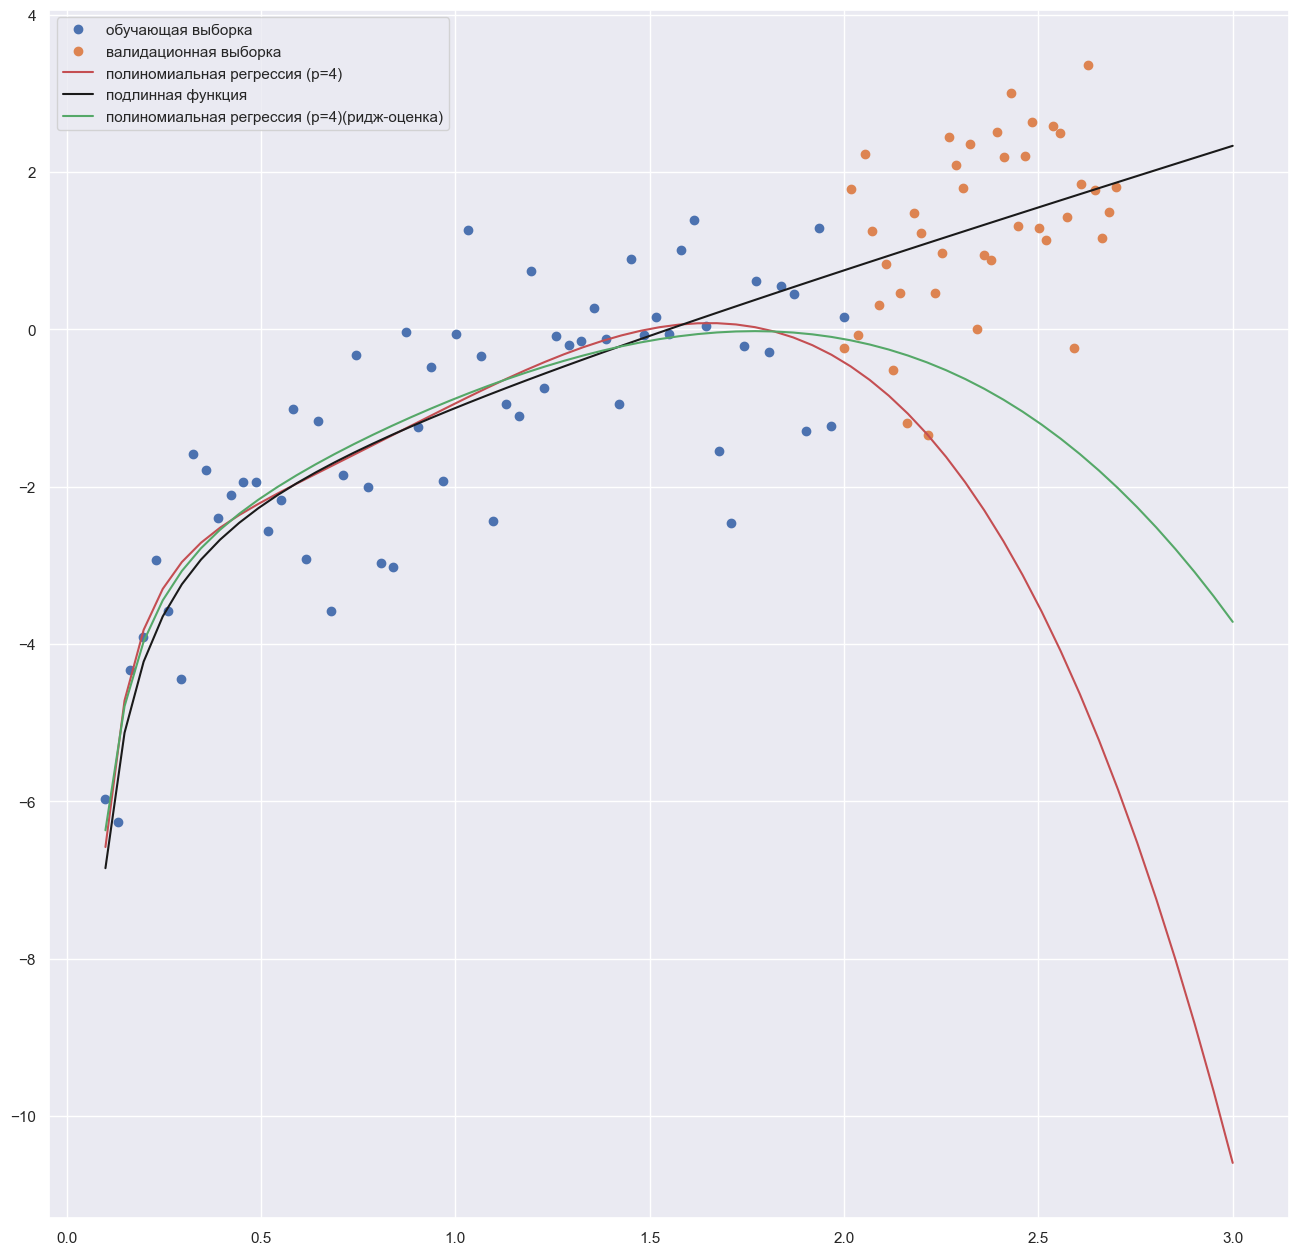

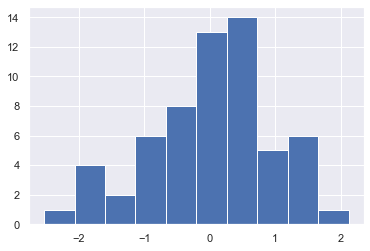

Критерий Шапиро-Уилка
statistic = 0.9778571128845215 pvalue = 0.3447631597518921
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 2.065648949285417
выборочный коэффициент корреляции r = -0.032824474642708434
гопотеза о некоррелированности принимается

значение f-статистики Бройша-Пагана (1.6886965851786728, 0.7927698658646448, 0.39820029199184276, 0.8090798571995039)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [1124]:
coeffs, errors, sigma_hat_2 = lr(X4, X4_test, X4_law, 'полиномиальная регрессия (p=4)')
errors_test(X4, errors, dl=1.44, du=1.73)

n = 60
k = 6
coeffs: [ 1.29707042 -0.71481637 -9.7701928  14.35528649 -7.23940644  1.17556186]
R^2 = 0.6984438855549142
RMSE = 0.933760158593961
VIF:
 [1190.4313951237043, 25.924489986338692, 4720.149871470146, 45024.35620501253, 62490.7714677316, 10526.039218575997]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 1.95838999e+01 -1.58269429e+00 -6.84772149e+01  9.38930400e+01
  -5.43816727e+01  1.11533598e+01]
 [-1.58269429e+00  1.35715123e-01  5.32751459e+00 -7.13190862e+00
   4.06507050e+00 -8.24324462e-01]
 [-6.84772149e+01  5.32751459e+00  2.49658766e+02 -3.52763868e+02
   2.08712016e+02 -4.34768907e+01]
 [ 9.38930400e+01 -7.13190862e+00 -3.52763868e+02  5.11188992e+02
  -3.08403588e+02  6.52193370e+01]
 [-5.43816727e+01  4.06507050e+00  2.08712016e+02 -3.08403588e+02
   1.89074984e+02 -4.05065397e+01]
 [ 1.11533598e+01 -8.24324462e-01 -4.34768907e+01  6.52193370e+01
  -4.05065397e+01  8.77250449e+00]]
след ковариационной матрицы tr = [[978.41486106]]
гипотез

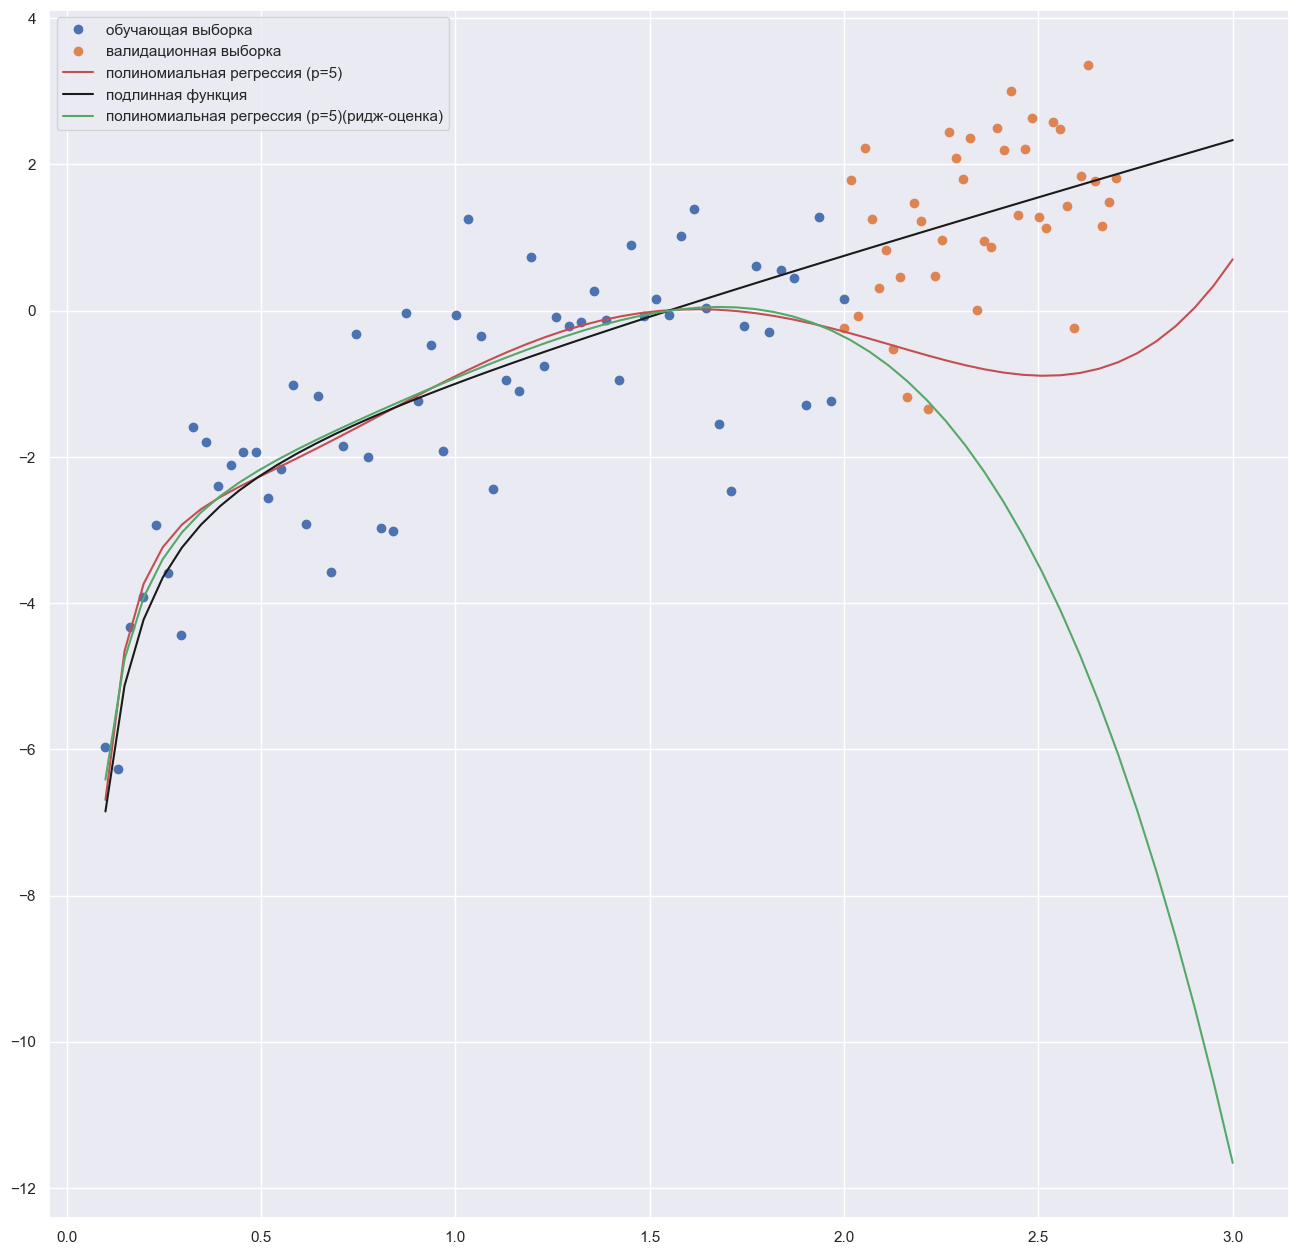

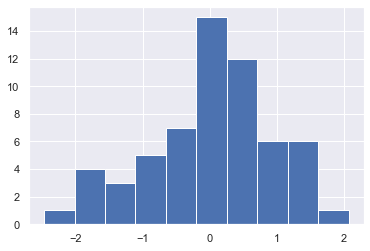

Критерий Шапиро-Уилка
statistic = 0.9781015515327454 pvalue = 0.3536180555820465
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 2.0781432001237548
выборочный коэффициент корреляции r = -0.039071600061877376
гопотеза о некоррелированности принимается

значение f-статистики Бройша-Пагана (1.8110876060898096, 0.874618063054259, 0.3361421504729312, 0.8888418640493105)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [1125]:
coeffs, errors, sigma_hat_2 = lr(X5, X5_test, X5_law, 'полиномиальная регрессия (p=5)')
errors_test(X5, errors, dl=1.41, du=1.77)

n = 60
k = 7
coeffs: [ -7.76835796  -0.14433613  36.02290182 -83.64349442  91.56111339
 -45.23191422   8.17950814]
R^2 = 0.7084608752995398
RMSE = 0.9181205179633308
VIF:
 [4027.9380752215575, 61.2361583779068, 27239.922240239892, 525490.0733852194, 1895038.5799924934, 1478344.4265363023, 165367.36369826848]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 6.52948347e+01 -4.45412399e+00 -2.99826715e+02  5.89758894e+02
  -5.54893376e+02  2.46458591e+02 -4.15022643e+01]
 [-4.45412399e+00  3.15883683e-01  1.98712625e+01 -3.83184635e+01
   3.55524741e+01 -1.56301058e+01  2.61170470e+00]
 [-2.99826715e+02  1.98712625e+01  1.41970505e+03 -2.85935750e+03
   2.73796144e+03 -1.23228560e+03  2.09644491e+02]
 [ 5.89758894e+02 -3.83184635e+01 -2.85935750e+03  5.87894951e+03
  -5.72310539e+03  2.60971736e+03 -4.48646345e+02]
 [-5.54893376e+02  3.55524741e+01  2.73796144e+03 -5.72310539e+03
   5.64985723e+03 -2.60619063e+03  4.52316771e+02]
 [ 2.46458591e+02 -1.56301058e+01 -1.

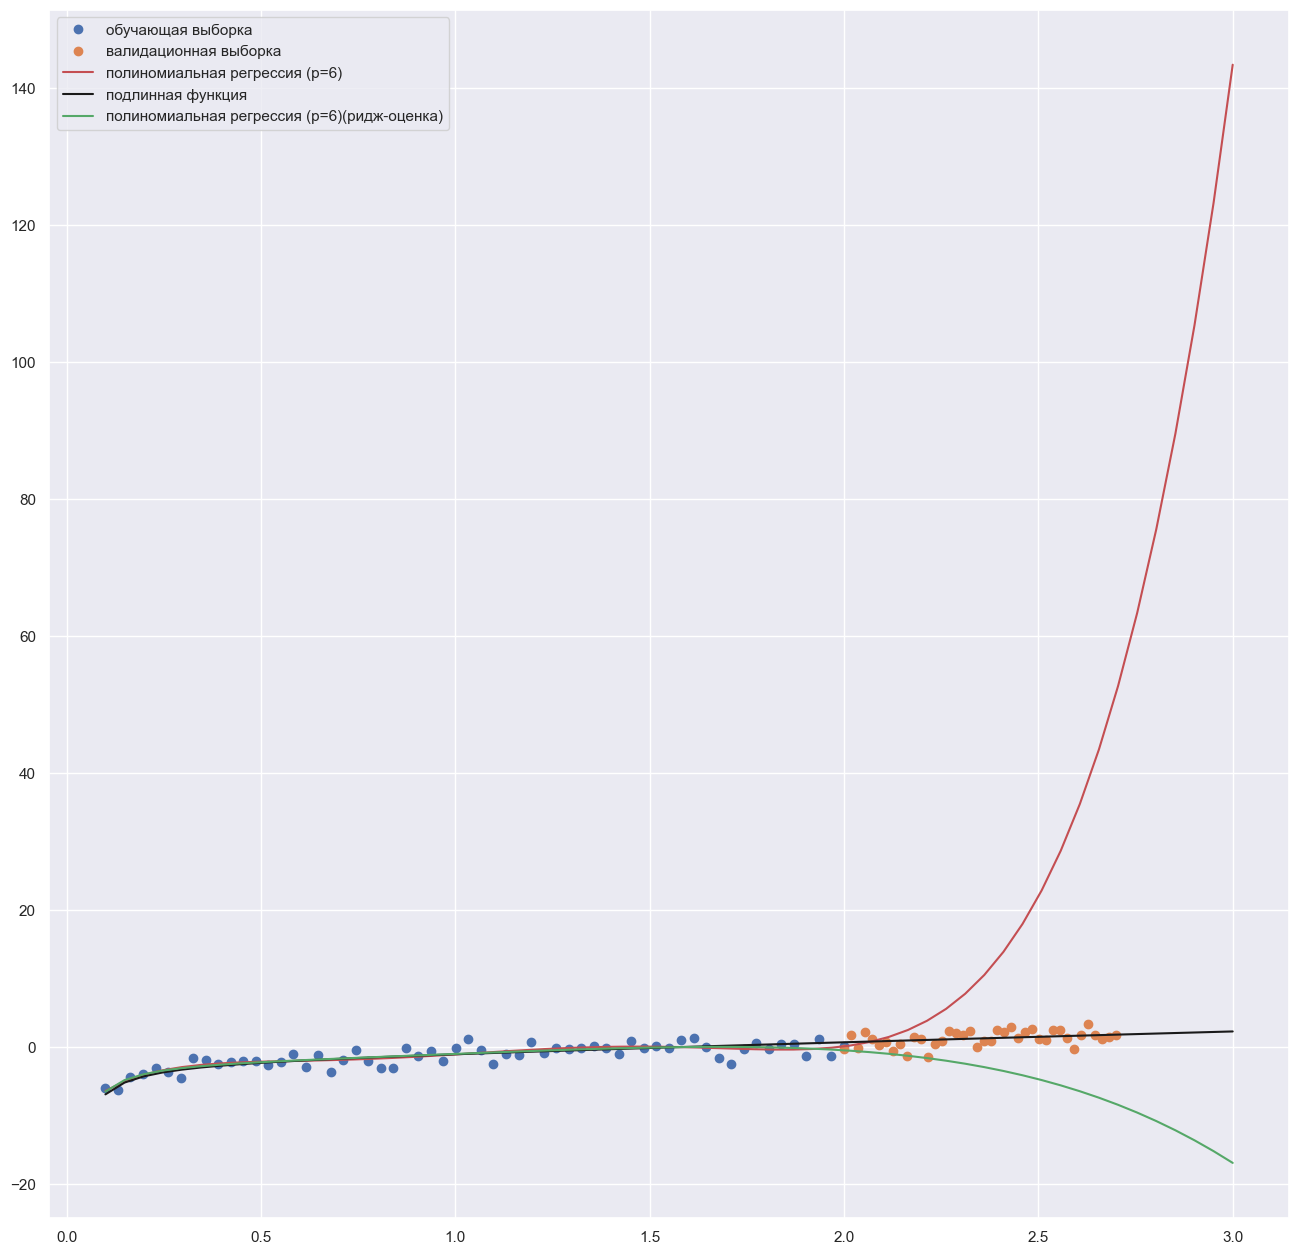

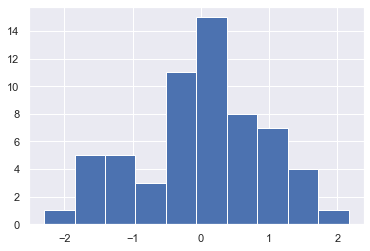

Критерий Шапиро-Уилка
statistic = 0.9833552241325378 pvalue = 0.5853950381278992
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 2.1189603401969075
выборочный коэффициент корреляции r = -0.059480170098453744
гопотеза о некоррелированности принимается

значение f-статистики Бройша-Пагана (6.888024848662422, 0.3313269338170717, 1.1455838221634236, 0.349347937989247)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [1126]:
coeffs, errors, sigma_hat_2 = lr(X6, X6_test, X6_law, 'полиномиальная регрессия (p=6)')
errors_test(X6, errors, dl=1.37, du=1.81)

# Регрессия с выбросами

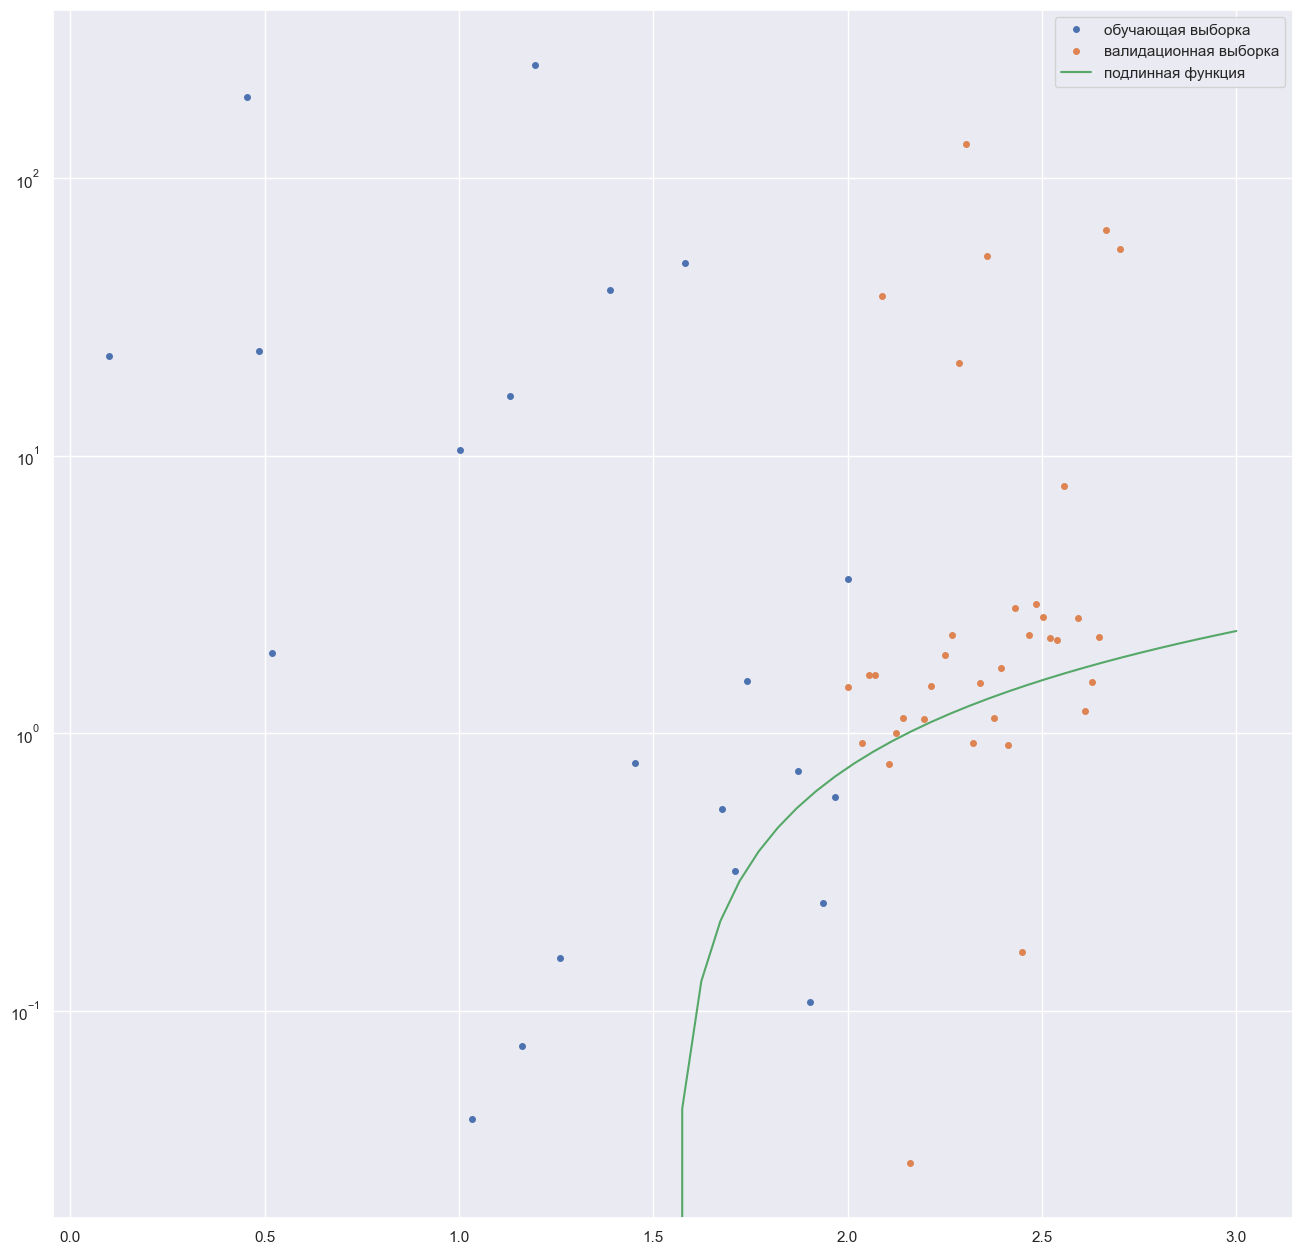

In [40]:
def gen_sample(n, h, delta, sigma, big_sigma):
    u_rand = [random.normalvariate(0, sigma**2) for _ in range(n)]
    v_rand = [random.normalvariate(0, big_sigma**2) for _ in range(n)]
    w_rand = [random.uniform(0.0, 1.0) for _ in range(n)]

    X = [law_fun(h[i]) + u_rand[i] if w_rand[i] > delta else v_rand[i] for i in range(n)]
    return np.array(X)

sample_size = 60
big_sigma = 10.0 * sigma
delta = 0.08
h_data_tukey = np.linspace(left_bound, right_bound, sample_size)
y_data_tukey = gen_sample(sample_size, h_data_tukey, delta=0.3, sigma=sigma, big_sigma=big_sigma)

test_sample_size = 40
shift = right_bound - left_bound
h_data_test_tukey = np.linspace(left_bound + shift, right_bound + 0.7, test_sample_size)
y_data_test_tukey = gen_sample(test_sample_size, h_data_test_tukey, delta=0.3, sigma=sigma, big_sigma=big_sigma)

plt.figure(figsize=(16, 16), dpi=100)
plt.plot(h_data_tukey, y_data_tukey, 'o', label='обучающая выборка', markersize=4)
plt.plot(h_data_test_tukey, y_data_test_tukey, 'o', label='валидационная выборка', markersize=4)
plt.plot(h_law, y_law, '-', label='подлинная функция')
plt.semilogy()
plt.legend()
plt.show()

n = 60
k = 2
coeffs: [-4.42556096  3.07514194]
R^2 = 0.0008880135027387048
RMSE = 57.52602377031284
VIF:
 [4.544661913627899, 0.9999999999999998]
Матрица H^T * H не мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 263.84899109 -195.99246585]
 [-195.99246585  186.65949129]]
след ковариационной матрицы tr = [[450.50848238]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
min modules coeffs: [-3.33635067  2.11705856]
МНМ R^2 = 0.0008880135027387302
МНМ RMSE = 57.52856542327514
Сумма квадратов отклонений на обучающей выборке (МНМ): 198572.15037960288
Сумма квадратов отклонений на тестовой выборке (МНМ): 35870.73766233452
Сумма модулей отклонений на обучающей выборке (МНМ): 1295.9413946810653
Сумма модулей отклонений на тестовой выборке (МНМ): 481.5709361682088
Сумма модулй отклонений на обучающей выборке: 1301.689762819862
Сумма модулей отклонений на тестовой выборке: 496.82481436900196
Сумма квадратов отклонений

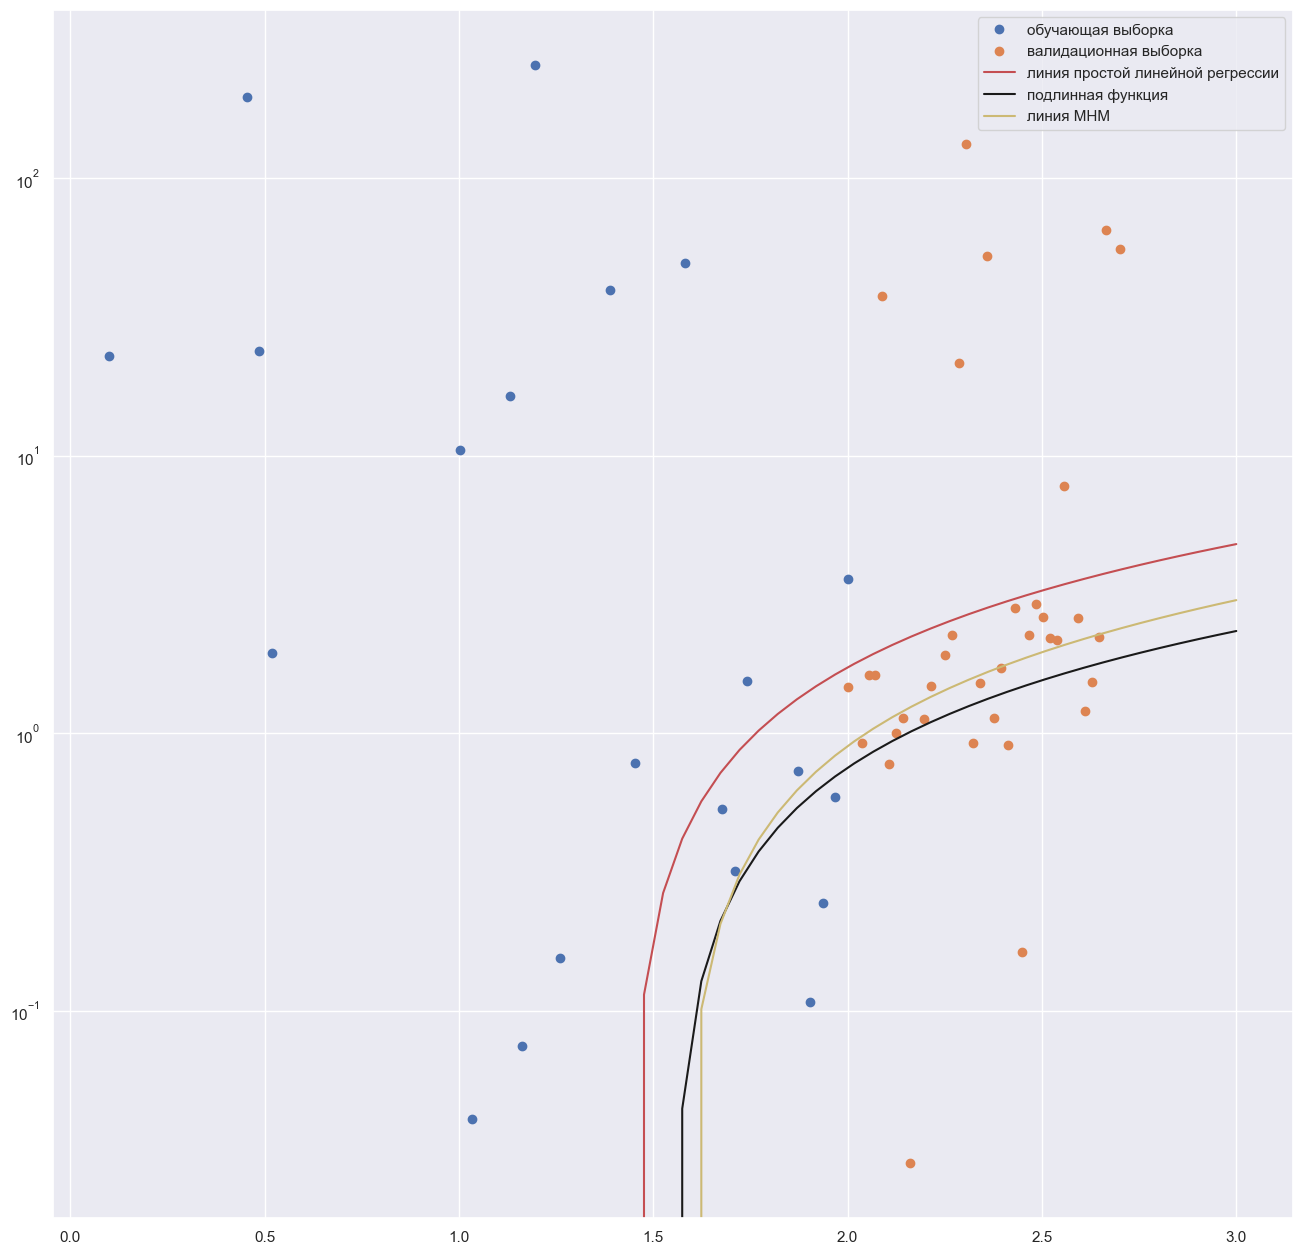

log_likehood = -329.80935678748773
AIC = 8.222434826506912
AIC_c = 8.432961142296387
BIC = 667.8074026994196


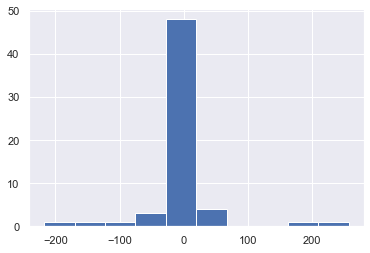

Критерий Шапиро-Уилка
statistic = 0.5610592365264893 pvalue = 4.028118550519766e-12
распределение ошибок нормальное на уровне значимости 0.05

значение статистики Дарбина-Уотсона: 2.0906609918834684
выборочный коэффициент корреляции r = -0.04533049594173422
гопотеза о некоррелированности принимается

значение f-статистики Бройша-Пагана (1.6853116655696332, 0.4305654936442611, 0.8236583927753863, 0.4439777353456147)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [41]:
coeffs, errors, sigma_hat_2 = lr(X1, X1_test, X1_law, 'линия простой линейной регрессии', show_method_min_module=True,
                                 y_data=y_data_tukey, y_data_test=y_data_test_tukey, semilogy=True)
log_likehood = -len(y_data_tukey) / 2.0 * (1 + np.log(2 * np.pi) + np.log(sigma_hat_2))
k = 2
AIC = 2 * k / len(y_data_tukey) + np.log(sigma_hat_2)
AIC_c = AIC + 2 * k * (k + 1) / (len(y_data_tukey) - k - 1)
BIC = k * np.log(len(y_data_tukey)) - 2 * log_likehood
print('log_likehood =', log_likehood)
print('AIC =', AIC)
print('AIC_c =', AIC_c)
print('BIC =', BIC)
errors_test(X2, errors, dl=1.51, du=1.65)

In [42]:
def tukey_loss(a, delta):
    if abs(a) < delta:
        return(delta ** 2 / 6 * (1 - (1 - (a / delta) ** 2) ** 3))
    else:
        return(delta ** 2 / 6)

def huber_loss(a, delta):
    if (abs(a) < delta):
        return(0.5 * a ** 2)
    else:
        return(delta * (abs(a) - delta * 0.5))

def sum_tukey_loss(b):
    X = X1.transpose()
    return sum([tukey_loss(y_data[i] - np.dot(X[i],b), 2) for i in range(len(y_data))])

def sum_huber_loss(b):
    X = X1.transpose()
    return sum([huber_loss(y_data[i] - np.dot(X[i],b), 0.1) for i in range(len(y_data))])

def tukey_huber_construct():
    model_tukey = minimize(sum_tukey_loss, [-3.5,2])
    model_huber = minimize(sum_huber_loss, [-3.5,2])
    
    print('tukey coeffs: ', model_tukey.x)
    print('huber coeffs: ', model_huber.x)
    
    print('tukey R^2 =', np.corrcoef(np.dot(X1, model_tukey.x), y_data)[0][1]**2)
    print('huber R^2 =', np.corrcoef(np.dot(X1, model_huber.x), y_data)[0][1]**2)
    
    eps_t = [(y_data[i] - np.dot(X1.transpose()[i], model_tukey.x))**2 for i in range(len(y_data))]
    eps_h = [(y_data[i] - np.dot(X1.transpose()[i], model_huber.x))**2 for i in range(len(y_data))]
    RMSE_t = np.sqrt(sum(eps_t) / len(y_data))
    print('tukey RMSE =', RMSE_t)
    RMSE_h = np.sqrt(sum(eps_h) / len(y_data))
    print('huber RMSE =', RMSE_h)
    print('Сумма квадратов отклонений на обучающей выборке (tukey):', ((y_data - np.dot(X1,model_tukey.x))**2).sum())
    print('Сумма квадратов отклонений на тестовой выборке (tukey):', ((y_data_test - np.dot(X1_test,model_tukey.x))**2).sum())
    print('Сумма квадратов отклонений на обучающей выборке (huber):', ((y_data - np.dot(X1,model_huber.x))**2).sum())
    print('Сумма квадратов отклонений на тестовой выборке (huber):', ((y_data_test - np.dot(X1_test,model_huber.x))**2).sum())

    plt.figure(figsize=(16, 7), dpi=100)
#     plt.grid()

    pylab.subplot (1, 2, 1)
    plt.plot(h_data_tukey, y_data_tukey, 'o', label='обучающая выборка', markersize=4)
    plt.plot(h_data_test_tukey, y_data_test_tukey, 'o', label='валидационная выборка', markersize=4)
    plt.plot(h_law, np.dot(X1_law, model_huber.x), 'r', label='кривая Хьюбера')
    plt.plot(h_law, y_law, 'k-', label='подлинная функция')
    plt.xlabel('h, delta = 0.1')
    plt.ylabel('X')
    plt.yscale('log')
    plt.legend()
    
    pylab.subplot (1, 2, 2)
    plt.plot(h_data_tukey, y_data_tukey, 'o', label='обучающая выборка', markersize=4)
    plt.plot(h_data_test_tukey, y_data_test_tukey, 'o', label='валидационная выборка', markersize=4)
    plt.plot(h_law, np.dot(X1_law, model_tukey.x), 'r', label='кривая Тьюки')
    plt.plot(h_law, y_law, 'k-', label='подлинная функция')
    plt.xlabel('h, delta = 2')
    plt.ylabel('X')
    plt.yscale('log')
    plt.legend()
    
    plt.show()
    
    return model_huber.x

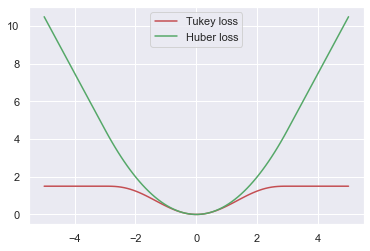

In [43]:
x_loss = np.linspace(-5.0, 5.0, 100)
y_tukey = [tukey_loss(x, 3.0) for x in x_loss]
y_huber = [huber_loss(x, 3.0) for x in x_loss]
plt.plot(x_loss, y_tukey, 'r', label='Tukey loss')
plt.plot(x_loss, y_huber, 'g', label='Huber loss')
plt.legend()
plt.show()

tukey coeffs:  [-3.02269897  2.02295768]
huber coeffs:  [-3.34292856  2.14703559]
tukey R^2 = 0.5453763066069278
huber R^2 = 0.5453763066069278
tukey RMSE = 1.2103890401208985
huber RMSE = 1.1614828478218897
Сумма квадратов отклонений на обучающей выборке (tukey): 87.90249770668741
Сумма квадратов отклонений на тестовой выборке (tukey): 46.52193221864373
Сумма квадратов отклонений на обучающей выборке (huber): 80.94254434706681
Сумма квадратов отклонений на тестовой выборке (huber): 45.486284839223735


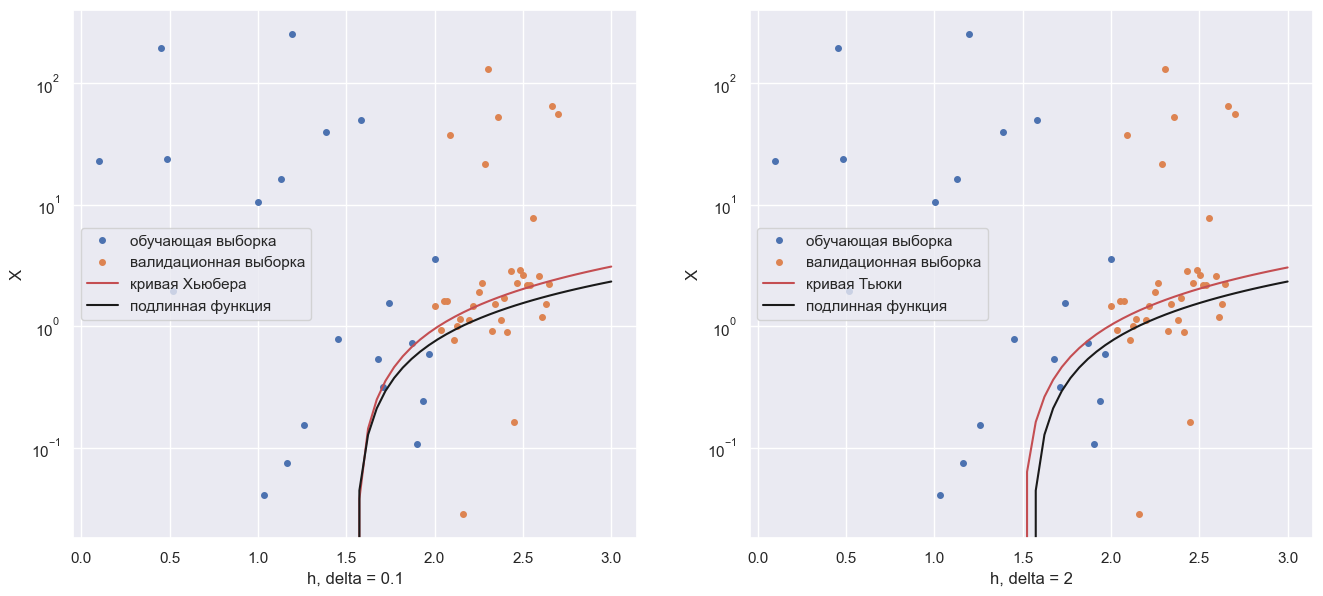

In [44]:
huber_coeffs = tukey_huber_construct()

In [45]:
df = open('src/data/data_clear.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x', 'y']])
    for i in range(len(h_data)):
        if abs(y_data_tukey[i] - np.dot(X1, huber_coeffs)[i]) < 3 * sigma:
            writer.writerows([[
                str(1.0),
                str(h_data[i]),
                str(y_data[i])]])

In [46]:
df = pd.read_csv('src/data/data_clear.csv')
y_data_clear = df['y']
X_clear = df[['intercept', 'x']]

In [47]:
df = open('src/data/data_clear_test.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x', 'y']])
    for i in range(len(h_data_test)):
        if abs(y_data_test_tukey[i] - np.dot(X1_test, huber_coeffs)[i]) < 3 * sigma:
            writer.writerows([[
                str(1.0),
                str(h_data_test[i]),
                str(y_data_test[i])]])

In [49]:
df = pd.read_csv('src/data/data_clear_test.csv')
y_data_test_clear = df['y']
X_test_clear = df[['intercept', 'x']]

n = 43
k = 2
coeffs: [-3.20305709  1.84118388]
R^2 = 0.46265142986838514
RMSE = 1.11108925713785
VIF:
 [4.952847767623609, 1.0]
Матрица H^T * H не мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 0.15285966 -0.10958277]
 [-0.10958277  0.09843205]]
след ковариационной матрицы tr = [[0.25129171]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
min modules coeffs: [-3.33635067  2.11705856]
МНМ R^2 = 0.46265142986838503
МНМ RMSE = 1.1351653167226858
Сумма квадратов отклонений на обучающей выборке (МНМ): 55.40981274047499
Сумма квадратов отклонений на тестовой выборке (МНМ): 38.85233037054651
Сумма модулей отклонений на обучающей выборке (МНМ): 38.91148864892991
Сумма модулей отклонений на тестовой выборке (МНМ): 28.377920992378037
Сумма модулй отклонений на обучающей выборке: 39.48704711946199
Сумма модулей отклонений на тестовой выборке: 26.771655103965358
Сумма квадратов отклонений на обучающей выборке: 53.0843

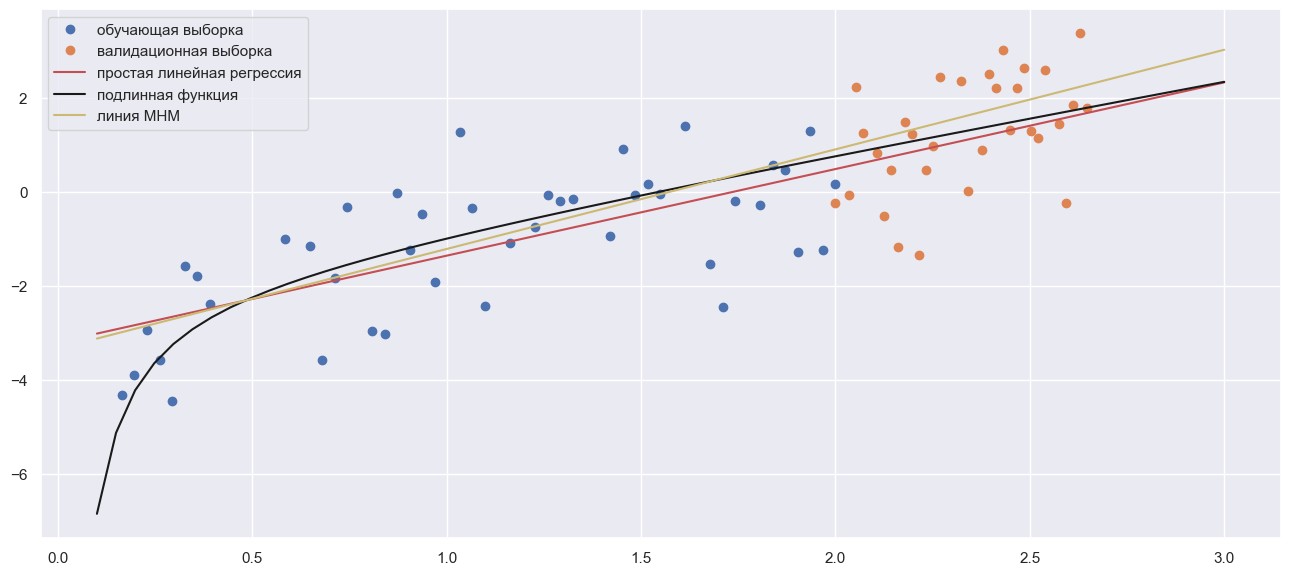

log_likehood = -93.62638265297689
AIC = 0.3496690220232175
AIC_c = 0.5601953378126912
BIC = 195.44145443039798


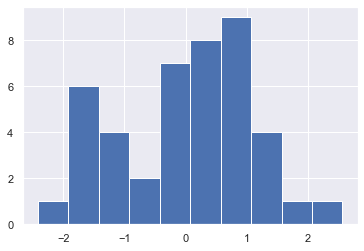

Критерий Шапиро-Уилка
statistic = 0.9739798903465271 pvalue = 0.42953744530677795
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 1.9396260744662377
выборочный коэффициент корреляции r = 0.030186962766881154
гопотеза о некоррелированности принимается

значение f-статистики Бройша-Пагана (0.0030358042647412598, 0.9560602835036256, 0.002894808440142463, 0.9573530963438843)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [89]:
coeffs, errors, sigma_hat_2 = lr(X_clear, X_test_clear, X1_law, 'простая линейная регрессия', show_method_min_module=True, y_data=y_data_clear, y_data_test=y_data_test_clear, X1=X_clear)
log_likehood = -len(y_data_tukey) / 2.0 * (1 + np.log(2 * np.pi) + np.log(sigma_hat_2))
k = 2
AIC = 2 * k / len(y_data_tukey) + np.log(sigma_hat_2)
AIC_c = AIC + 2 * k * (k + 1) / (len(y_data_tukey) - k - 1)
BIC = k * np.log(len(y_data_tukey)) - 2 * log_likehood
print('log_likehood =', log_likehood)
print('AIC =', AIC)
print('AIC_c =', AIC_c)
print('BIC =', BIC)
errors_test(X_clear, errors, dl=1.51, du=1.65)

# Квантильная регрессия

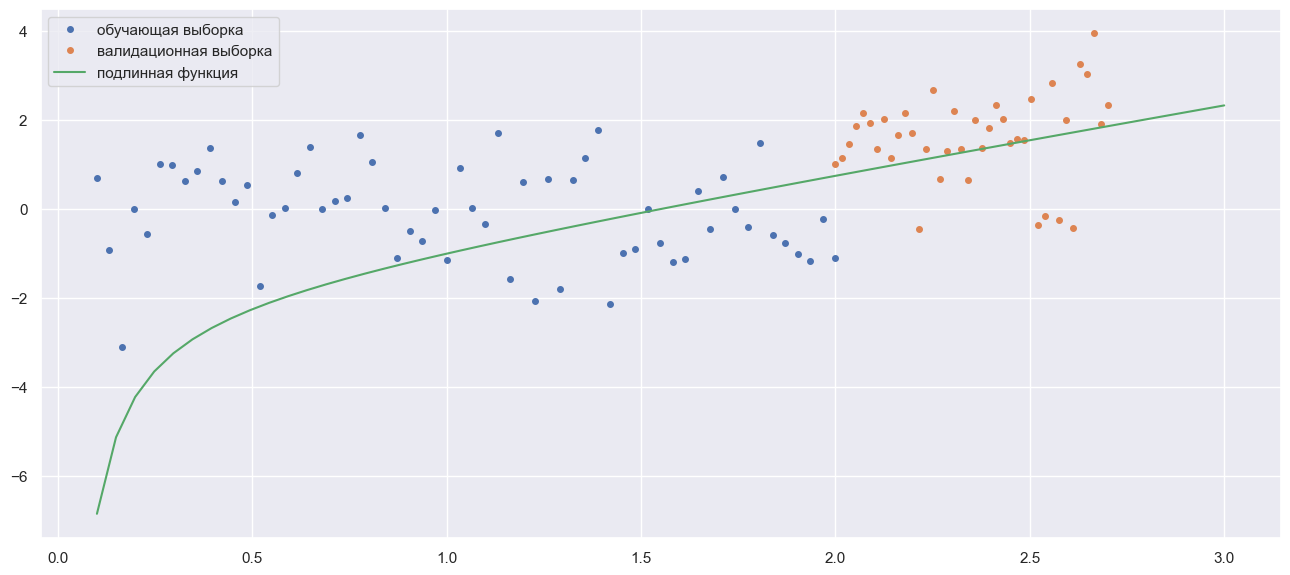

In [90]:
sample_size = 60
delta = 0.9
u_rand = [random.normalvariate(0, sigma**2) for _ in range(sample_size)]
w_rand = [random.uniform(0.0, 1.0) for _ in range(sample_size)]
h_data_quantile = np.linspace(left_bound, right_bound, sample_size)
y_data_quantile = [law_fun(h_data_quantile[i]) +
                   np.abs(u_rand[i]) if w_rand[i] > delta else u_rand[i] for i in range(sample_size)]

test_sample_size = 40
shift = right_bound - left_bound
h_data_test_quantile = np.linspace(left_bound + shift, right_bound + 0.7, test_sample_size)
u_rand = [random.normalvariate(0, sigma**2) for _ in range(test_sample_size)]
w_rand = [random.uniform(0.0, 1.0) for _ in range(test_sample_size)]
h_data_test_quantile = np.linspace(left_bound + shift, right_bound + 0.7, test_sample_size)
y_data_test_quantile = [law_fun(h_data_test_quantile[i]) +
                   np.abs(u_rand[i]) if w_rand[i] < delta else u_rand[i] for i in range(test_sample_size)]

plt.figure(figsize=(16, 7), dpi=100)
plt.plot(h_data_quantile, y_data_quantile, 'o', label='обучающая выборка', markersize=4)
plt.plot(h_data_test_quantile, y_data_test_quantile, 'o', label='валидационная выборка', markersize=4)
plt.plot(h_law, y_law, '-', label='подлинная функция')
plt.legend()
plt.show()

In [72]:
df_quantile = open('src/data/data_quantile.csv', 'w', newline='')
with df_quantile:
    writer = csv.writer(df_quantile)
    writer.writerows([['intercept', 'xm1', 'x', 'x2', 'y']])
    for i in range(len(h_data_quantile)):
        writer.writerows([[
            str(1.0),
            str(h_data_quantile[i]**(-1)),
            str(h_data_quantile[i]),
            str(h_data_quantile[i]**2),
            str(y_data_quantile[i])]])

In [92]:
df_quantile = pd.read_csv('src/data/data_quantile.csv')
y_data_quantile = df_quantile['y']
X_quantile = df_quantile[['intercept', 'x']]

In [74]:
df_quantile_test = open('src/data/data_quantile_test.csv', 'w', newline='')
with df_quantile_test:
    writer = csv.writer(df_quantile_test)
    writer.writerows([['intercept', 'xm1', 'x', 'x2', 'y']])
    for i in range(len(h_data_test_quantile)):
        writer.writerows([[
            str(1.0),
            str(h_data_test_quantile[i]**(-1)),
            str(h_data_test_quantile[i]),
            str(h_data_test_quantile[i]**2),
            str(y_data_test_quantile[i])]])

In [93]:
df_quantile_test = pd.read_csv('src/data/data_quantile_test.csv')
y_data_test_quantile = df_quantile_test['y']
X_test_quantile = df_quantile_test[['intercept', 'x']]

n = 60
k = 2
coeffs: [-0.40816109  0.33800036]
R^2 = 0.044457961994865514
RMSE = 0.8739149754231706
VIF:
 [4.544661913627899, 0.9999999999999998]
Матрица H^T * H не мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 0.06089268 -0.04523234]
 [-0.04523234  0.04307842]]
след ковариационной матрицы tr = [[0.1039711]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
min modules coeffs: [-3.33635067  2.11705856]
МНМ R^2 = 0.04445796199486548
МНМ RMSE = 1.6947371705856205
Сумма квадратов отклонений на обучающей выборке (МНМ): 172.32804464187322
Сумма квадратов отклонений на тестовой выборке (МНМ): 48.24109152352979
Сумма модулей отклонений на обучающей выборке (МНМ): 81.90424843816838
Сумма модулей отклонений на тестовой выборке (МНМ): 31.50261992067512
Сумма модулй отклонений на обучающей выборке: 41.91776961942673
Сумма модулей отклонений на тестовой выборке: 70.90457793584753
Сумма квадратов отклонений на обучающей 

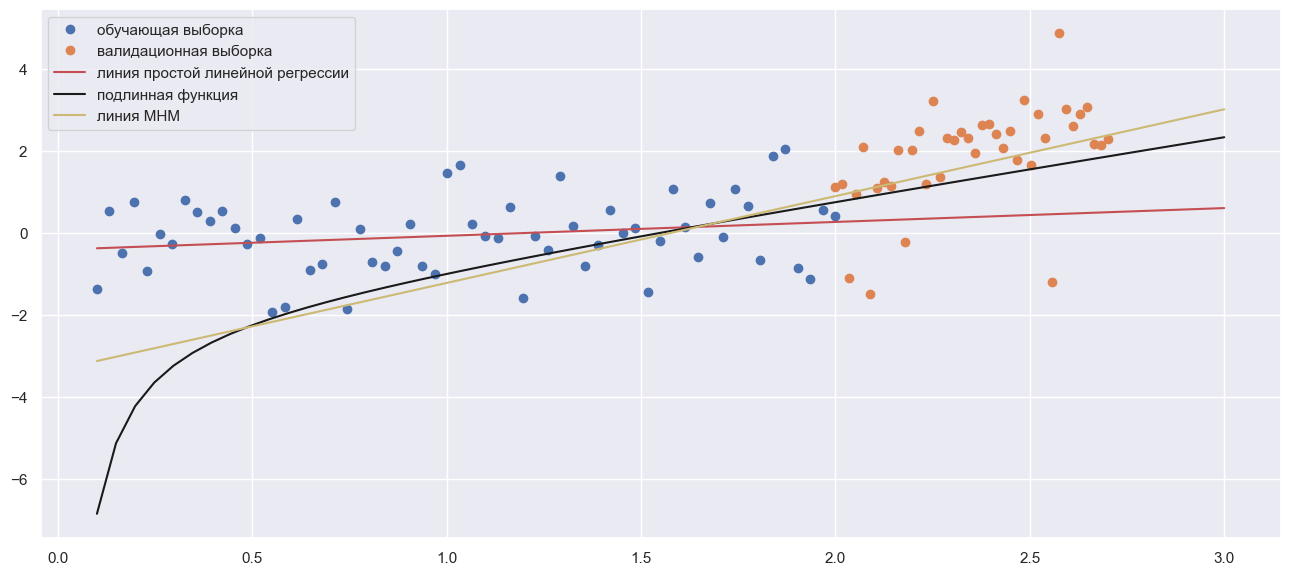

log_likehood = -78.58877941290689
AIC = -0.1515844193124491
AIC_c = 0.05894189647702458
BIC = 165.36624795025799


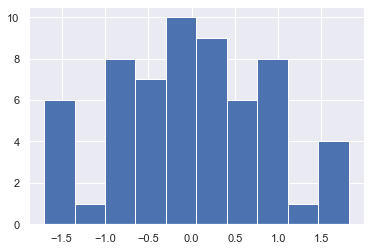

Критерий Шапиро-Уилка
statistic = 0.9827781915664673 pvalue = 0.5565621256828308
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 1.9568913256301783
выборочный коэффициент корреляции r = 0.021554337184910843
гопотеза о некоррелированности принимается

значение f-статистики Бройша-Пагана (0.4193152119122523, 0.5172789381001024, 0.40819071444732924, 0.5254043956930965)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [94]:
coeffs, errors, sigma_hat_2 = lr(X_quantile, X_test_quantile, X1_law, 'линия простой линейной регрессии', show_method_min_module=True, y_data=y_data_quantile, y_data_test=y_data_test_quantile, X1=X_quantile)
log_likehood = -len(y_data_tukey) / 2.0 * (1 + np.log(2 * np.pi) + np.log(sigma_hat_2))
k = 2
AIC = 2 * k / len(y_data_quantile) + np.log(sigma_hat_2)
AIC_c = AIC + 2 * k * (k + 1) / (len(y_data_quantile) - k - 1)
BIC = k * np.log(len(y_data_quantile)) - 2 * log_likehood
print('log_likehood =', log_likehood)
print('AIC =', AIC)
print('AIC_c =', AIC_c)
print('BIC =', BIC)
errors_test(X_quantile, errors, dl=1.51, du=1.65)

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:             0.005540
Model:                       QuantReg   Bandwidth:                       1.108
Method:                 Least Squares   Sparsity:                        3.713
Date:                Thu, 16 Dec 2021   No. Observations:                   60
Time:                        11:40:48   Df Residuals:                       58
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9414      0.381     -2.471      0.016      -1.704      -0.179
x              0.0428      0.325      0.131      0.896      -0.609       0.694



                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:235: RuntimeWarning: invalid value encountered in less_equal
  kernels['epa'] = lambda u: 3. / 4 * (1-u**2) * np.where(np.abs(u) <= 1, 1, 0)


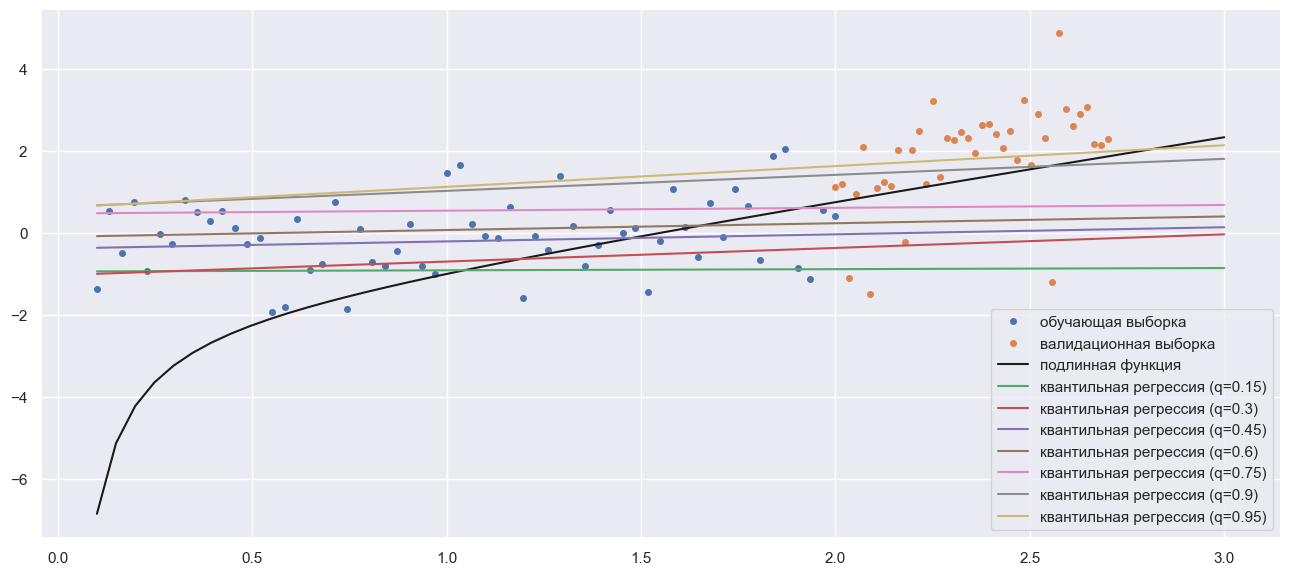

In [77]:
quants = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 0.95]

plt.figure(figsize=(16, 7), dpi=100)
# plt.grid()
plt.plot(h_data_quantile, y_data_quantile, 'o', label='обучающая выборка', markersize=4)
plt.plot(h_data_test_quantile, y_data_test_quantile, 'o', label='валидационная выборка', markersize=4)
plt.plot(h_law, y_law, 'k-', label='подлинная функция')

for q in quants:
    quant_reg = smf.quantreg("y ~ x", df_quantile).fit(q=q)
    print(quant_reg.summary())
    print('\n\n')
    plt.plot(h_law, np.dot(X_quantile[['intercept', 'x']], np.array(quant_reg.params)), label='квантильная регрессия (q=' + str(q) + ')')

plt.legend()
plt.show()